In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn as sk
from keras.models import load_model

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Praca_magisterska/LSTM/Natural_gas/NaturalGas_df.csv')
df

,Date,Close,Open,High,Low,7 Days SMA,7 Days STD,7 Days SMA +2STD,7 Days SMA -2STD,Cumulative Change Sum,14 Days EMA,MACD,ATR
0,2013-01-22,3.558,3.572,3.645,3.505,3.46,0.09,3.64,3.28,9.89,3.38,0.07,0.128
1,2013-01-23,3.554,3.573,3.596,3.512,3.49,0.07,3.63,3.35,9.78,3.41,0.08,0.125
2,2013-01-24,3.446,3.570,3.592,3.441,3.50,0.06,3.62,3.38,6.74,3.41,0.08,0.127
3,2013-01-25,3.444,3.452,3.480,3.411,3.50,0.06,3.62,3.38,6.68,3.42,0.07,0.123
4,2013-01-28,3.289,3.392,3.396,3.267,3.48,0.10,3.68,3.28,2.18,3.40,0.06,0.127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2023-11-13,3.197,3.064,3.246,3.061,3.19,0.17,3.53,2.85,133.04,3.19,0.04,0.166
2648,2023-11-14,3.106,3.233,3.264,3.086,3.13,0.08,3.29,2.97,130.19,3.18,0.03,0.167
2649,2023-11-15,3.362,3.316,3.448,3.269,3.14,0.11,3.36,2.92,138.43,3.20,0.05,0.179
2650,2023-11-16,3.239,3.326,3.407,3.188,3.15,0.12,3.39,2.91,134.77,3.21,0.04,0.182


In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Praca_magisterska/LSTM/Natural_gas/NaturalGas_test_df.csv')
df_test

,Date,Close
0,2023-11-20,2.882
1,2023-11-21,2.846
2,2023-11-22,2.897
3,2023-11-23,2.930
4,2023-11-24,2.855
5,2023-11-27,2.794
6,2023-11-28,2.706
7,2023-11-29,2.804
8,2023-11-30,2.802
9,2023-12-01,2.773


In [ ]:
train_len = int(len(df)*0.85)
train_len

2254

### Przygotowanie danych wejściowych do modelu

In [ ]:
df_close = df[['Close']]
df_close

,Close
Date,
2013-01-22,3.558
2013-01-23,3.554
2013-01-24,3.446
2013-01-25,3.444
2013-01-28,3.289
...,...
2023-11-13,3.197
2023-11-14,3.106
2023-11-15,3.362


In [ ]:
df_train_close = df_close[:train_len]
df_val_close = df_close[train_len:]

In [ ]:
df_train_close_scaled = df_train_close.copy()
df_val_close_scaled = df_val_close.copy()

In [ ]:
scaler_close = sk.preprocessing.MinMaxScaler(feature_range=(0, 1))

In [ ]:
df_train_close_scaled[df_train_close_scaled.columns] = scaler_close.fit_transform(df_train_close_scaled[df_train_close_scaled.columns])
df_train_close_scaled

,Close
Date,
2013-01-22,0.509448
2013-01-23,0.508466
2013-01-24,0.481963
2013-01-25,0.481472
2013-01-28,0.443436
...,...
2021-08-20,0.581350
2021-08-23,0.604417
2021-08-24,0.592393


In [ ]:
df_val_close_scaled[df_val_close_scaled.columns] = scaler_close.transform(df_val_close_scaled[df_val_close_scaled.columns])
df_val_close_scaled

,Close
Date,
2021-08-27,0.708712
2021-08-30,0.692761
2021-08-31,0.710429
2021-09-01,0.768834
2021-09-02,0.775215
...,...
2023-11-13,0.420859
2023-11-14,0.398528
2023-11-15,0.461350


In [ ]:
def train_val_close(dataframe, days, days_predict):
  dataframe = dataframe['Close'].values
  X_input=[]
  y_input=[]
  for i in range(days, len(dataframe)-days_predict+1):
    X_input.append(dataframe[i-days:i])
    y_input.append(dataframe[i:i+days_predict])

  X_input, y_input = np.array(X_input), np.array(y_input)
  X_input = np.reshape(X_input, (X_input.shape[0], days, 1))

  return X_input, y_input

In [ ]:
X_train_close, y_train_close = train_val_close(df_train_close_scaled, 60, 30)
X_val_close, y_val_close = train_val_close(df_val_close_scaled, 60, 30)

In [ ]:
y_train_close.shape

(2165, 30)

In [ ]:
X_train_close.shape

(2165, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Praca_magisterska/LSTM/Natural_gas/Multi_output/Close_only/Modele/30_days')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Praca_magisterska/LSTM/Natural_gas/Multi_output/Close_only/Modele/30_days(2)'

In [ ]:
units = [16,32,64]
batch_size=[32,64,128]
dropout=[0.0,0.2,0.5]

### 100 Epochs

14 dni

In [ ]:
X_train_close.shape, y_train_close.shape

((2211, 14, 1), (2211, 30))

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_100_days_14_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(30))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=100, batch_size=batch, verbose=2)
      model.save(name)
      del model

Epoch 1/100
70/70 - 6s - 91ms/step - loss: 0.0845
Epoch 2/100
70/70 - 1s - 18ms/step - loss: 0.0090
Epoch 3/100
70/70 - 1s - 11ms/step - loss: 0.0070
Epoch 4/100
70/70 - 1s - 18ms/step - loss: 0.0069
Epoch 5/100
70/70 - 1s - 18ms/step - loss: 0.0068
Epoch 6/100
70/70 - 1s - 11ms/step - loss: 0.0068
Epoch 7/100
70/70 - 1s - 18ms/step - loss: 0.0066
Epoch 8/100
70/70 - 1s - 18ms/step - loss: 0.0065
Epoch 9/100
70/70 - 1s - 21ms/step - loss: 0.0065
Epoch 10/100
70/70 - 1s - 16ms/step - loss: 0.0065
Epoch 11/100
70/70 - 1s - 16ms/step - loss: 0.0066
Epoch 12/100
70/70 - 1s - 16ms/step - loss: 0.0067
Epoch 13/100
70/70 - 1s - 13ms/step - loss: 0.0063
Epoch 14/100
70/70 - 1s - 16ms/step - loss: 0.0064
Epoch 15/100
70/70 - 1s - 11ms/step - loss: 0.0062
Epoch 16/100
70/70 - 1s - 18ms/step - loss: 0.0061
Epoch 17/100
70/70 - 1s - 18ms/step - loss: 0.0061
Epoch 18/100
70/70 - 1s - 11ms/step - loss: 0.0061
Epoch 19/100
70/70 - 1s - 18ms/step - loss: 0.0061
Epoch 20/100
70/70 - 1s - 18ms/step - lo

Epoch 1/100
35/35 - 4s - 119ms/step - loss: 0.1041
Epoch 2/100
35/35 - 1s - 18ms/step - loss: 0.0202
Epoch 3/100
35/35 - 0s - 11ms/step - loss: 0.0083
Epoch 4/100
35/35 - 0s - 12ms/step - loss: 0.0073
Epoch 5/100
35/35 - 0s - 12ms/step - loss: 0.0070
Epoch 6/100
35/35 - 1s - 19ms/step - loss: 0.0069
Epoch 7/100
35/35 - 0s - 12ms/step - loss: 0.0069
Epoch 8/100
35/35 - 1s - 18ms/step - loss: 0.0068
Epoch 9/100
35/35 - 1s - 17ms/step - loss: 0.0068
Epoch 10/100
35/35 - 0s - 12ms/step - loss: 0.0069
Epoch 11/100
35/35 - 1s - 17ms/step - loss: 0.0068
Epoch 12/100
35/35 - 1s - 18ms/step - loss: 0.0067
Epoch 13/100
35/35 - 1s - 17ms/step - loss: 0.0067
Epoch 14/100
35/35 - 1s - 18ms/step - loss: 0.0067
Epoch 15/100
35/35 - 0s - 12ms/step - loss: 0.0067
Epoch 16/100
35/35 - 0s - 12ms/step - loss: 0.0066
Epoch 17/100
35/35 - 1s - 23ms/step - loss: 0.0068
Epoch 18/100
35/35 - 1s - 17ms/step - loss: 0.0066
Epoch 19/100
35/35 - 1s - 18ms/step - loss: 0.0066
Epoch 20/100
35/35 - 1s - 17ms/step - l

Epoch 1/100
18/18 - 3s - 176ms/step - loss: 0.1442
Epoch 2/100
18/18 - 0s - 12ms/step - loss: 0.0871
Epoch 3/100
18/18 - 0s - 17ms/step - loss: 0.0424
Epoch 4/100
18/18 - 0s - 16ms/step - loss: 0.0220
Epoch 5/100
18/18 - 0s - 17ms/step - loss: 0.0125
Epoch 6/100
18/18 - 0s - 13ms/step - loss: 0.0087
Epoch 7/100
18/18 - 0s - 13ms/step - loss: 0.0075
Epoch 8/100
18/18 - 0s - 12ms/step - loss: 0.0072
Epoch 9/100
18/18 - 0s - 18ms/step - loss: 0.0071
Epoch 10/100
18/18 - 0s - 16ms/step - loss: 0.0069
Epoch 11/100
18/18 - 0s - 13ms/step - loss: 0.0069
Epoch 12/100
18/18 - 0s - 18ms/step - loss: 0.0069
Epoch 13/100
18/18 - 0s - 15ms/step - loss: 0.0068
Epoch 14/100
18/18 - 0s - 12ms/step - loss: 0.0068
Epoch 15/100
18/18 - 0s - 13ms/step - loss: 0.0069
Epoch 16/100
18/18 - 0s - 13ms/step - loss: 0.0067
Epoch 17/100
18/18 - 0s - 12ms/step - loss: 0.0068
Epoch 18/100
18/18 - 0s - 12ms/step - loss: 0.0067
Epoch 19/100
18/18 - 0s - 12ms/step - loss: 0.0066
Epoch 20/100
18/18 - 0s - 24ms/step - l

Epoch 1/100
70/70 - 5s - 64ms/step - loss: 0.0450
Epoch 2/100
70/70 - 1s - 19ms/step - loss: 0.0072
Epoch 3/100
70/70 - 1s - 15ms/step - loss: 0.0069
Epoch 4/100
70/70 - 1s - 11ms/step - loss: 0.0068
Epoch 5/100
70/70 - 1s - 18ms/step - loss: 0.0067
Epoch 6/100
70/70 - 1s - 18ms/step - loss: 0.0066
Epoch 7/100
70/70 - 1s - 11ms/step - loss: 0.0066
Epoch 8/100
70/70 - 1s - 11ms/step - loss: 0.0066
Epoch 9/100
70/70 - 1s - 11ms/step - loss: 0.0070
Epoch 10/100
70/70 - 1s - 18ms/step - loss: 0.0064
Epoch 11/100
70/70 - 1s - 11ms/step - loss: 0.0064
Epoch 12/100
70/70 - 1s - 17ms/step - loss: 0.0064
Epoch 13/100
70/70 - 1s - 11ms/step - loss: 0.0063
Epoch 14/100
70/70 - 2s - 24ms/step - loss: 0.0063
Epoch 15/100
70/70 - 1s - 18ms/step - loss: 0.0065
Epoch 16/100
70/70 - 1s - 17ms/step - loss: 0.0062
Epoch 17/100
70/70 - 1s - 12ms/step - loss: 0.0063
Epoch 18/100
70/70 - 1s - 11ms/step - loss: 0.0061
Epoch 19/100
70/70 - 1s - 11ms/step - loss: 0.0062
Epoch 20/100
70/70 - 1s - 11ms/step - lo

Epoch 1/100
35/35 - 3s - 93ms/step - loss: 0.0771
Epoch 2/100
35/35 - 1s - 18ms/step - loss: 0.0097
Epoch 3/100
35/35 - 0s - 12ms/step - loss: 0.0070
Epoch 4/100
35/35 - 0s - 12ms/step - loss: 0.0069
Epoch 5/100
35/35 - 0s - 12ms/step - loss: 0.0069
Epoch 6/100
35/35 - 1s - 18ms/step - loss: 0.0068
Epoch 7/100
35/35 - 0s - 12ms/step - loss: 0.0068
Epoch 8/100
35/35 - 0s - 12ms/step - loss: 0.0068
Epoch 9/100
35/35 - 1s - 17ms/step - loss: 0.0068
Epoch 10/100
35/35 - 1s - 18ms/step - loss: 0.0067
Epoch 11/100
35/35 - 1s - 17ms/step - loss: 0.0067
Epoch 12/100
35/35 - 1s - 18ms/step - loss: 0.0067
Epoch 13/100
35/35 - 1s - 25ms/step - loss: 0.0067
Epoch 14/100
35/35 - 1s - 37ms/step - loss: 0.0065
Epoch 15/100
35/35 - 1s - 19ms/step - loss: 0.0067
Epoch 16/100
35/35 - 1s - 20ms/step - loss: 0.0065
Epoch 17/100
35/35 - 1s - 28ms/step - loss: 0.0065
Epoch 18/100
35/35 - 0s - 12ms/step - loss: 0.0065
Epoch 19/100
35/35 - 1s - 17ms/step - loss: 0.0065
Epoch 20/100
35/35 - 1s - 18ms/step - lo

Epoch 1/100
18/18 - 4s - 237ms/step - loss: 0.1304
Epoch 2/100
18/18 - 0s - 16ms/step - loss: 0.0448
Epoch 3/100
18/18 - 0s - 16ms/step - loss: 0.0122
Epoch 4/100
18/18 - 0s - 16ms/step - loss: 0.0076
Epoch 5/100
18/18 - 0s - 14ms/step - loss: 0.0073
Epoch 6/100
18/18 - 0s - 15ms/step - loss: 0.0070
Epoch 7/100
18/18 - 0s - 18ms/step - loss: 0.0070
Epoch 8/100
18/18 - 0s - 16ms/step - loss: 0.0070
Epoch 9/100
18/18 - 0s - 16ms/step - loss: 0.0070
Epoch 10/100
18/18 - 0s - 15ms/step - loss: 0.0069
Epoch 11/100
18/18 - 0s - 15ms/step - loss: 0.0068
Epoch 12/100
18/18 - 0s - 15ms/step - loss: 0.0068
Epoch 13/100
18/18 - 0s - 17ms/step - loss: 0.0068
Epoch 14/100
18/18 - 0s - 17ms/step - loss: 0.0069
Epoch 15/100
18/18 - 0s - 16ms/step - loss: 0.0068
Epoch 16/100
18/18 - 0s - 17ms/step - loss: 0.0068
Epoch 17/100
18/18 - 0s - 16ms/step - loss: 0.0067
Epoch 18/100
18/18 - 0s - 16ms/step - loss: 0.0068
Epoch 19/100
18/18 - 0s - 16ms/step - loss: 0.0067
Epoch 20/100
18/18 - 0s - 17ms/step - l

Epoch 1/100
70/70 - 4s - 55ms/step - loss: 0.0343
Epoch 2/100
70/70 - 1s - 16ms/step - loss: 0.0071
Epoch 3/100
70/70 - 2s - 23ms/step - loss: 0.0070
Epoch 4/100
70/70 - 1s - 21ms/step - loss: 0.0068
Epoch 5/100
70/70 - 2s - 28ms/step - loss: 0.0067
Epoch 6/100
70/70 - 1s - 13ms/step - loss: 0.0067
Epoch 7/100
70/70 - 1s - 18ms/step - loss: 0.0066
Epoch 8/100
70/70 - 1s - 18ms/step - loss: 0.0064
Epoch 9/100
70/70 - 1s - 19ms/step - loss: 0.0064
Epoch 10/100
70/70 - 1s - 18ms/step - loss: 0.0065
Epoch 11/100
70/70 - 1s - 18ms/step - loss: 0.0066
Epoch 12/100
70/70 - 1s - 13ms/step - loss: 0.0063
Epoch 13/100
70/70 - 2s - 26ms/step - loss: 0.0062
Epoch 14/100
70/70 - 3s - 36ms/step - loss: 0.0064
Epoch 15/100
70/70 - 1s - 13ms/step - loss: 0.0061
Epoch 16/100
70/70 - 1s - 18ms/step - loss: 0.0063
Epoch 17/100
70/70 - 1s - 18ms/step - loss: 0.0060
Epoch 18/100
70/70 - 1s - 18ms/step - loss: 0.0059
Epoch 19/100
70/70 - 1s - 18ms/step - loss: 0.0060
Epoch 20/100
70/70 - 1s - 18ms/step - lo

Epoch 1/100
35/35 - 5s - 133ms/step - loss: 0.0497
Epoch 2/100
35/35 - 1s - 18ms/step - loss: 0.0075
Epoch 3/100
35/35 - 1s - 17ms/step - loss: 0.0071
Epoch 4/100
35/35 - 1s - 18ms/step - loss: 0.0069
Epoch 5/100
35/35 - 1s - 18ms/step - loss: 0.0068
Epoch 6/100
35/35 - 1s - 17ms/step - loss: 0.0068
Epoch 7/100
35/35 - 1s - 17ms/step - loss: 0.0068
Epoch 8/100
35/35 - 1s - 17ms/step - loss: 0.0067
Epoch 9/100
35/35 - 1s - 19ms/step - loss: 0.0068
Epoch 10/100
35/35 - 1s - 18ms/step - loss: 0.0066
Epoch 11/100
35/35 - 1s - 16ms/step - loss: 0.0065
Epoch 12/100
35/35 - 1s - 17ms/step - loss: 0.0066
Epoch 13/100
35/35 - 1s - 17ms/step - loss: 0.0064
Epoch 14/100
35/35 - 1s - 24ms/step - loss: 0.0065
Epoch 15/100
35/35 - 1s - 22ms/step - loss: 0.0064
Epoch 16/100
35/35 - 1s - 42ms/step - loss: 0.0064
Epoch 17/100
35/35 - 1s - 37ms/step - loss: 0.0063
Epoch 18/100
35/35 - 1s - 37ms/step - loss: 0.0063
Epoch 19/100
35/35 - 1s - 24ms/step - loss: 0.0063
Epoch 20/100
35/35 - 1s - 17ms/step - l

Epoch 1/100
18/18 - 3s - 191ms/step - loss: 0.0967
Epoch 2/100
18/18 - 1s - 36ms/step - loss: 0.0141
Epoch 3/100
18/18 - 1s - 34ms/step - loss: 0.0078
Epoch 4/100
18/18 - 1s - 34ms/step - loss: 0.0071
Epoch 5/100
18/18 - 1s - 35ms/step - loss: 0.0069
Epoch 6/100
18/18 - 1s - 35ms/step - loss: 0.0070
Epoch 7/100
18/18 - 1s - 33ms/step - loss: 0.0068
Epoch 8/100
18/18 - 1s - 36ms/step - loss: 0.0068
Epoch 9/100
18/18 - 1s - 34ms/step - loss: 0.0068
Epoch 10/100
18/18 - 1s - 66ms/step - loss: 0.0068
Epoch 11/100
18/18 - 1s - 74ms/step - loss: 0.0068
Epoch 12/100
18/18 - 1s - 69ms/step - loss: 0.0067
Epoch 13/100
18/18 - 1s - 64ms/step - loss: 0.0067
Epoch 14/100
18/18 - 1s - 41ms/step - loss: 0.0067
Epoch 15/100
18/18 - 1s - 35ms/step - loss: 0.0066
Epoch 16/100
18/18 - 1s - 69ms/step - loss: 0.0067
Epoch 17/100
18/18 - 1s - 35ms/step - loss: 0.0066
Epoch 18/100
18/18 - 1s - 34ms/step - loss: 0.0065
Epoch 19/100
18/18 - 1s - 33ms/step - loss: 0.0066
Epoch 20/100
18/18 - 1s - 34ms/step - l

30 dni

In [ ]:
X_train_close.shape, y_train_close.shape

((2195, 30, 1), (2195, 30))

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_100_days_30_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(30))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=100, batch_size=batch, verbose=2)
      model.save(name)
      del model

Epoch 1/100
69/69 - 4s - 64ms/step - loss: 0.0727
Epoch 2/100
69/69 - 1s - 17ms/step - loss: 0.0099
Epoch 3/100
69/69 - 1s - 17ms/step - loss: 0.0075
Epoch 4/100
69/69 - 1s - 21ms/step - loss: 0.0072
Epoch 5/100
69/69 - 3s - 43ms/step - loss: 0.0068
Epoch 6/100
69/69 - 2s - 32ms/step - loss: 0.0067
Epoch 7/100
69/69 - 2s - 29ms/step - loss: 0.0068
Epoch 8/100
69/69 - 2s - 30ms/step - loss: 0.0066
Epoch 9/100
69/69 - 1s - 19ms/step - loss: 0.0064
Epoch 10/100
69/69 - 1s - 18ms/step - loss: 0.0064
Epoch 11/100
69/69 - 1s - 18ms/step - loss: 0.0063
Epoch 12/100
69/69 - 1s - 18ms/step - loss: 0.0063
Epoch 13/100
69/69 - 1s - 19ms/step - loss: 0.0061
Epoch 14/100
69/69 - 1s - 20ms/step - loss: 0.0061
Epoch 15/100
69/69 - 3s - 45ms/step - loss: 0.0061
Epoch 16/100
69/69 - 2s - 27ms/step - loss: 0.0060
Epoch 17/100
69/69 - 1s - 18ms/step - loss: 0.0060
Epoch 18/100
69/69 - 1s - 18ms/step - loss: 0.0060
Epoch 19/100
69/69 - 1s - 19ms/step - loss: 0.0060
Epoch 20/100
69/69 - 1s - 18ms/step - lo

Epoch 1/100
35/35 - 4s - 103ms/step - loss: 0.1148
Epoch 2/100
35/35 - 1s - 20ms/step - loss: 0.0308
Epoch 3/100
35/35 - 1s - 20ms/step - loss: 0.0102
Epoch 4/100
35/35 - 1s - 41ms/step - loss: 0.0079
Epoch 5/100
35/35 - 1s - 30ms/step - loss: 0.0077
Epoch 6/100
35/35 - 1s - 36ms/step - loss: 0.0073
Epoch 7/100
35/35 - 1s - 37ms/step - loss: 0.0071
Epoch 8/100
35/35 - 1s - 25ms/step - loss: 0.0070
Epoch 9/100
35/35 - 1s - 19ms/step - loss: 0.0069
Epoch 10/100
35/35 - 1s - 19ms/step - loss: 0.0067
Epoch 11/100
35/35 - 1s - 36ms/step - loss: 0.0066
Epoch 12/100
35/35 - 1s - 36ms/step - loss: 0.0066
Epoch 13/100
35/35 - 1s - 37ms/step - loss: 0.0069
Epoch 14/100
35/35 - 1s - 35ms/step - loss: 0.0067
Epoch 15/100
35/35 - 1s - 20ms/step - loss: 0.0064
Epoch 16/100
35/35 - 1s - 36ms/step - loss: 0.0063
Epoch 17/100
35/35 - 1s - 20ms/step - loss: 0.0063
Epoch 18/100
35/35 - 2s - 47ms/step - loss: 0.0065
Epoch 19/100
35/35 - 1s - 35ms/step - loss: 0.0062
Epoch 20/100
35/35 - 1s - 34ms/step - l

Epoch 1/100
18/18 - 3s - 188ms/step - loss: 0.1545
Epoch 2/100
18/18 - 0s - 23ms/step - loss: 0.0870
Epoch 3/100
18/18 - 1s - 33ms/step - loss: 0.0453
Epoch 4/100
18/18 - 0s - 22ms/step - loss: 0.0240
Epoch 5/100
18/18 - 1s - 47ms/step - loss: 0.0136
Epoch 6/100
18/18 - 1s - 35ms/step - loss: 0.0096
Epoch 7/100
18/18 - 1s - 36ms/step - loss: 0.0083
Epoch 8/100
18/18 - 1s - 34ms/step - loss: 0.0079
Epoch 9/100
18/18 - 1s - 36ms/step - loss: 0.0077
Epoch 10/100
18/18 - 1s - 37ms/step - loss: 0.0075
Epoch 11/100
18/18 - 1s - 55ms/step - loss: 0.0074
Epoch 12/100
18/18 - 1s - 34ms/step - loss: 0.0072
Epoch 13/100
18/18 - 0s - 22ms/step - loss: 0.0073
Epoch 14/100
18/18 - 0s - 23ms/step - loss: 0.0072
Epoch 15/100
18/18 - 1s - 33ms/step - loss: 0.0070
Epoch 16/100
18/18 - 0s - 23ms/step - loss: 0.0069
Epoch 17/100
18/18 - 1s - 33ms/step - loss: 0.0069
Epoch 18/100
18/18 - 1s - 35ms/step - loss: 0.0067
Epoch 19/100
18/18 - 1s - 35ms/step - loss: 0.0067
Epoch 20/100
18/18 - 0s - 23ms/step - l

Epoch 1/100
69/69 - 5s - 78ms/step - loss: 0.0492
Epoch 2/100
69/69 - 1s - 19ms/step - loss: 0.0077
Epoch 3/100
69/69 - 3s - 37ms/step - loss: 0.0074
Epoch 4/100
69/69 - 1s - 20ms/step - loss: 0.0070
Epoch 5/100
69/69 - 1s - 20ms/step - loss: 0.0069
Epoch 6/100
69/69 - 3s - 43ms/step - loss: 0.0068
Epoch 7/100
69/69 - 2s - 30ms/step - loss: 0.0066
Epoch 8/100
69/69 - 2s - 26ms/step - loss: 0.0064
Epoch 9/100
69/69 - 1s - 20ms/step - loss: 0.0063
Epoch 10/100
69/69 - 3s - 38ms/step - loss: 0.0062
Epoch 11/100
69/69 - 1s - 20ms/step - loss: 0.0062
Epoch 12/100
69/69 - 1s - 19ms/step - loss: 0.0062
Epoch 13/100
69/69 - 1s - 19ms/step - loss: 0.0060
Epoch 14/100
69/69 - 3s - 49ms/step - loss: 0.0061
Epoch 15/100
69/69 - 2s - 27ms/step - loss: 0.0060
Epoch 16/100
69/69 - 2s - 30ms/step - loss: 0.0061
Epoch 17/100
69/69 - 3s - 45ms/step - loss: 0.0060
Epoch 18/100
69/69 - 3s - 39ms/step - loss: 0.0061
Epoch 19/100
69/69 - 1s - 19ms/step - loss: 0.0058
Epoch 20/100
69/69 - 2s - 29ms/step - lo

Epoch 1/100
35/35 - 6s - 169ms/step - loss: 0.0771
Epoch 2/100
35/35 - 2s - 70ms/step - loss: 0.0104
Epoch 3/100
35/35 - 2s - 70ms/step - loss: 0.0073
Epoch 4/100
35/35 - 1s - 23ms/step - loss: 0.0071
Epoch 5/100
35/35 - 1s - 23ms/step - loss: 0.0071
Epoch 6/100
35/35 - 1s - 23ms/step - loss: 0.0069
Epoch 7/100
35/35 - 1s - 23ms/step - loss: 0.0069
Epoch 8/100
35/35 - 1s - 36ms/step - loss: 0.0068
Epoch 9/100
35/35 - 1s - 23ms/step - loss: 0.0066
Epoch 10/100
35/35 - 1s - 35ms/step - loss: 0.0066
Epoch 11/100
35/35 - 1s - 37ms/step - loss: 0.0065
Epoch 12/100
35/35 - 1s - 38ms/step - loss: 0.0065
Epoch 13/100
35/35 - 2s - 57ms/step - loss: 0.0063
Epoch 14/100
35/35 - 1s - 22ms/step - loss: 0.0062
Epoch 15/100
35/35 - 1s - 23ms/step - loss: 0.0062
Epoch 16/100
35/35 - 1s - 35ms/step - loss: 0.0063
Epoch 17/100
35/35 - 1s - 36ms/step - loss: 0.0061
Epoch 18/100
35/35 - 1s - 37ms/step - loss: 0.0061
Epoch 19/100
35/35 - 1s - 23ms/step - loss: 0.0060
Epoch 20/100
35/35 - 1s - 35ms/step - l

Epoch 1/100
18/18 - 3s - 191ms/step - loss: 0.1123
Epoch 2/100
18/18 - 1s - 49ms/step - loss: 0.0299
Epoch 3/100
18/18 - 1s - 45ms/step - loss: 0.0106
Epoch 4/100
18/18 - 1s - 70ms/step - loss: 0.0080
Epoch 5/100
18/18 - 1s - 58ms/step - loss: 0.0076
Epoch 6/100
18/18 - 1s - 28ms/step - loss: 0.0075
Epoch 7/100
18/18 - 0s - 27ms/step - loss: 0.0074
Epoch 8/100
18/18 - 0s - 28ms/step - loss: 0.0071
Epoch 9/100
18/18 - 0s - 27ms/step - loss: 0.0071
Epoch 10/100
18/18 - 1s - 35ms/step - loss: 0.0071
Epoch 11/100
18/18 - 1s - 35ms/step - loss: 0.0070
Epoch 12/100
18/18 - 0s - 27ms/step - loss: 0.0069
Epoch 13/100
18/18 - 1s - 28ms/step - loss: 0.0070
Epoch 14/100
18/18 - 0s - 27ms/step - loss: 0.0068
Epoch 15/100
18/18 - 1s - 28ms/step - loss: 0.0067
Epoch 16/100
18/18 - 0s - 27ms/step - loss: 0.0067
Epoch 17/100
18/18 - 1s - 36ms/step - loss: 0.0067
Epoch 18/100
18/18 - 0s - 27ms/step - loss: 0.0068
Epoch 19/100
18/18 - 1s - 28ms/step - loss: 0.0066
Epoch 20/100
18/18 - 1s - 33ms/step - l

Epoch 1/100
69/69 - 6s - 91ms/step - loss: 0.0287
Epoch 2/100
69/69 - 2s - 24ms/step - loss: 0.0072
Epoch 3/100
69/69 - 3s - 37ms/step - loss: 0.0068
Epoch 4/100
69/69 - 2s - 25ms/step - loss: 0.0067
Epoch 5/100
69/69 - 3s - 37ms/step - loss: 0.0067
Epoch 6/100
69/69 - 2s - 33ms/step - loss: 0.0063
Epoch 7/100
69/69 - 3s - 42ms/step - loss: 0.0063
Epoch 8/100
69/69 - 4s - 56ms/step - loss: 0.0063
Epoch 9/100
69/69 - 3s - 37ms/step - loss: 0.0060
Epoch 10/100
69/69 - 3s - 37ms/step - loss: 0.0066
Epoch 11/100
69/69 - 3s - 49ms/step - loss: 0.0060
Epoch 12/100
69/69 - 4s - 62ms/step - loss: 0.0061
Epoch 13/100
69/69 - 2s - 25ms/step - loss: 0.0059
Epoch 14/100
69/69 - 2s - 25ms/step - loss: 0.0061
Epoch 15/100
69/69 - 3s - 36ms/step - loss: 0.0059
Epoch 16/100
69/69 - 2s - 31ms/step - loss: 0.0058
Epoch 17/100
69/69 - 3s - 42ms/step - loss: 0.0060
Epoch 18/100
69/69 - 2s - 27ms/step - loss: 0.0057
Epoch 19/100
69/69 - 2s - 24ms/step - loss: 0.0058
Epoch 20/100
69/69 - 3s - 37ms/step - lo

Epoch 1/100
35/35 - 5s - 135ms/step - loss: 0.0521
Epoch 2/100
35/35 - 1s - 33ms/step - loss: 0.0080
Epoch 3/100
35/35 - 1s - 36ms/step - loss: 0.0073
Epoch 4/100
35/35 - 1s - 33ms/step - loss: 0.0070
Epoch 5/100
35/35 - 1s - 35ms/step - loss: 0.0070
Epoch 6/100
35/35 - 1s - 36ms/step - loss: 0.0070
Epoch 7/100
35/35 - 1s - 36ms/step - loss: 0.0068
Epoch 8/100
35/35 - 2s - 45ms/step - loss: 0.0065
Epoch 9/100
35/35 - 3s - 77ms/step - loss: 0.0067
Epoch 10/100
35/35 - 2s - 55ms/step - loss: 0.0066
Epoch 11/100
35/35 - 1s - 36ms/step - loss: 0.0064
Epoch 12/100
35/35 - 1s - 31ms/step - loss: 0.0063
Epoch 13/100
35/35 - 1s - 37ms/step - loss: 0.0063
Epoch 14/100
35/35 - 1s - 31ms/step - loss: 0.0062
Epoch 15/100
35/35 - 1s - 31ms/step - loss: 0.0060
Epoch 16/100
35/35 - 1s - 36ms/step - loss: 0.0060
Epoch 17/100
35/35 - 2s - 45ms/step - loss: 0.0062
Epoch 18/100
35/35 - 2s - 52ms/step - loss: 0.0060
Epoch 19/100
35/35 - 2s - 56ms/step - loss: 0.0061
Epoch 20/100
35/35 - 1s - 33ms/step - l

Epoch 1/100
18/18 - 4s - 234ms/step - loss: 0.0874
Epoch 2/100
18/18 - 1s - 70ms/step - loss: 0.0129
Epoch 3/100
18/18 - 1s - 71ms/step - loss: 0.0081
Epoch 4/100
18/18 - 1s - 69ms/step - loss: 0.0074
Epoch 5/100
18/18 - 1s - 69ms/step - loss: 0.0072
Epoch 6/100
18/18 - 2s - 109ms/step - loss: 0.0071
Epoch 7/100
18/18 - 3s - 164ms/step - loss: 0.0070
Epoch 8/100
18/18 - 1s - 75ms/step - loss: 0.0070
Epoch 9/100
18/18 - 1s - 70ms/step - loss: 0.0068
Epoch 10/100
18/18 - 1s - 71ms/step - loss: 0.0070
Epoch 11/100
18/18 - 1s - 68ms/step - loss: 0.0067
Epoch 12/100
18/18 - 1s - 68ms/step - loss: 0.0066
Epoch 13/100
18/18 - 1s - 67ms/step - loss: 0.0066
Epoch 14/100
18/18 - 1s - 73ms/step - loss: 0.0066
Epoch 15/100
18/18 - 1s - 76ms/step - loss: 0.0065
Epoch 16/100
18/18 - 2s - 129ms/step - loss: 0.0064
Epoch 17/100
18/18 - 2s - 126ms/step - loss: 0.0066
Epoch 18/100
18/18 - 1s - 67ms/step - loss: 0.0063
Epoch 19/100
18/18 - 1s - 66ms/step - loss: 0.0063
Epoch 20/100
18/18 - 1s - 68ms/step

60 dni

In [ ]:
X_train_close.shape, y_train_close.shape

((2165, 60, 1), (2165, 30))

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_100_days_60_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(30))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=100, batch_size=batch, verbose=2)
      model.save(name)
      del model

Epoch 1/100
68/68 - 5s - 79ms/step - loss: 0.0841
Epoch 2/100
68/68 - 3s - 37ms/step - loss: 0.0097
Epoch 3/100
68/68 - 3s - 37ms/step - loss: 0.0070
Epoch 4/100
68/68 - 4s - 56ms/step - loss: 0.0068
Epoch 5/100
68/68 - 4s - 56ms/step - loss: 0.0067
Epoch 6/100
68/68 - 2s - 31ms/step - loss: 0.0067
Epoch 7/100
68/68 - 3s - 37ms/step - loss: 0.0065
Epoch 8/100
68/68 - 3s - 44ms/step - loss: 0.0064
Epoch 9/100
68/68 - 4s - 51ms/step - loss: 0.0064
Epoch 10/100
68/68 - 2s - 33ms/step - loss: 0.0063
Epoch 11/100
68/68 - 2s - 31ms/step - loss: 0.0062
Epoch 12/100
68/68 - 3s - 38ms/step - loss: 0.0062
Epoch 13/100
68/68 - 2s - 31ms/step - loss: 0.0061
Epoch 14/100
68/68 - 3s - 48ms/step - loss: 0.0060
Epoch 15/100
68/68 - 5s - 76ms/step - loss: 0.0061
Epoch 16/100
68/68 - 3s - 48ms/step - loss: 0.0060
Epoch 17/100
68/68 - 2s - 31ms/step - loss: 0.0060
Epoch 18/100
68/68 - 3s - 43ms/step - loss: 0.0059
Epoch 19/100
68/68 - 4s - 63ms/step - loss: 0.0060
Epoch 20/100
68/68 - 2s - 31ms/step - lo

Epoch 1/100
34/34 - 5s - 159ms/step - loss: 0.1070
Epoch 2/100
34/34 - 2s - 51ms/step - loss: 0.0279
Epoch 3/100
34/34 - 1s - 35ms/step - loss: 0.0095
Epoch 4/100
34/34 - 1s - 37ms/step - loss: 0.0075
Epoch 5/100
34/34 - 1s - 35ms/step - loss: 0.0070
Epoch 6/100
34/34 - 1s - 37ms/step - loss: 0.0069
Epoch 7/100
34/34 - 1s - 37ms/step - loss: 0.0067
Epoch 8/100
34/34 - 1s - 38ms/step - loss: 0.0066
Epoch 9/100
34/34 - 1s - 37ms/step - loss: 0.0065
Epoch 10/100
34/34 - 1s - 43ms/step - loss: 0.0066
Epoch 11/100
34/34 - 3s - 89ms/step - loss: 0.0065
Epoch 12/100
34/34 - 2s - 54ms/step - loss: 0.0065
Epoch 13/100
34/34 - 1s - 38ms/step - loss: 0.0063
Epoch 14/100
34/34 - 1s - 37ms/step - loss: 0.0064
Epoch 15/100
34/34 - 1s - 35ms/step - loss: 0.0063
Epoch 16/100
34/34 - 1s - 35ms/step - loss: 0.0062
Epoch 17/100
34/34 - 1s - 37ms/step - loss: 0.0062
Epoch 18/100
34/34 - 1s - 37ms/step - loss: 0.0061
Epoch 19/100
34/34 - 1s - 42ms/step - loss: 0.0062
Epoch 20/100
34/34 - 3s - 90ms/step - l

Epoch 1/100
17/17 - 4s - 214ms/step - loss: 0.1300
Epoch 2/100
17/17 - 1s - 39ms/step - loss: 0.0698
Epoch 3/100
17/17 - 1s - 75ms/step - loss: 0.0370
Epoch 4/100
17/17 - 2s - 100ms/step - loss: 0.0191
Epoch 5/100
17/17 - 1s - 73ms/step - loss: 0.0117
Epoch 6/100
17/17 - 1s - 78ms/step - loss: 0.0091
Epoch 7/100
17/17 - 1s - 51ms/step - loss: 0.0082
Epoch 8/100
17/17 - 1s - 39ms/step - loss: 0.0078
Epoch 9/100
17/17 - 1s - 41ms/step - loss: 0.0075
Epoch 10/100
17/17 - 1s - 73ms/step - loss: 0.0073
Epoch 11/100
17/17 - 1s - 74ms/step - loss: 0.0072
Epoch 12/100
17/17 - 1s - 74ms/step - loss: 0.0071
Epoch 13/100
17/17 - 1s - 39ms/step - loss: 0.0071
Epoch 14/100
17/17 - 1s - 40ms/step - loss: 0.0069
Epoch 15/100
17/17 - 1s - 40ms/step - loss: 0.0069
Epoch 16/100
17/17 - 1s - 39ms/step - loss: 0.0068
Epoch 17/100
17/17 - 1s - 75ms/step - loss: 0.0067
Epoch 18/100
17/17 - 1s - 51ms/step - loss: 0.0067
Epoch 19/100
17/17 - 1s - 87ms/step - loss: 0.0067
Epoch 20/100
17/17 - 1s - 77ms/step - 

Epoch 1/100
68/68 - 10s - 146ms/step - loss: 0.0409
Epoch 2/100
68/68 - 6s - 85ms/step - loss: 0.0073
Epoch 3/100
68/68 - 4s - 65ms/step - loss: 0.0070
Epoch 4/100
68/68 - 5s - 75ms/step - loss: 0.0069
Epoch 5/100
68/68 - 6s - 93ms/step - loss: 0.0067
Epoch 6/100
68/68 - 3s - 42ms/step - loss: 0.0065
Epoch 7/100
68/68 - 5s - 74ms/step - loss: 0.0064
Epoch 8/100
68/68 - 6s - 93ms/step - loss: 0.0064
Epoch 9/100
68/68 - 4s - 57ms/step - loss: 0.0064
Epoch 10/100
68/68 - 3s - 42ms/step - loss: 0.0064
Epoch 11/100
68/68 - 6s - 94ms/step - loss: 0.0062
Epoch 12/100
68/68 - 4s - 56ms/step - loss: 0.0061
Epoch 13/100
68/68 - 5s - 75ms/step - loss: 0.0060
Epoch 14/100
68/68 - 6s - 90ms/step - loss: 0.0060
Epoch 15/100
68/68 - 4s - 61ms/step - loss: 0.0060
Epoch 16/100
68/68 - 3s - 42ms/step - loss: 0.0059
Epoch 17/100
68/68 - 6s - 95ms/step - loss: 0.0059
Epoch 18/100
68/68 - 4s - 55ms/step - loss: 0.0059
Epoch 19/100
68/68 - 5s - 75ms/step - loss: 0.0059
Epoch 20/100
68/68 - 4s - 56ms/step - 

Epoch 1/100
34/34 - 5s - 136ms/step - loss: 0.0694
Epoch 2/100
34/34 - 2s - 46ms/step - loss: 0.0091
Epoch 3/100
34/34 - 2s - 45ms/step - loss: 0.0072
Epoch 4/100
34/34 - 3s - 88ms/step - loss: 0.0069
Epoch 5/100
34/34 - 3s - 89ms/step - loss: 0.0069
Epoch 6/100
34/34 - 2s - 48ms/step - loss: 0.0068
Epoch 7/100
34/34 - 2s - 46ms/step - loss: 0.0067
Epoch 8/100
34/34 - 3s - 75ms/step - loss: 0.0066
Epoch 9/100
34/34 - 2s - 46ms/step - loss: 0.0065
Epoch 10/100
34/34 - 3s - 78ms/step - loss: 0.0065
Epoch 11/100
34/34 - 3s - 103ms/step - loss: 0.0065
Epoch 12/100
34/34 - 4s - 119ms/step - loss: 0.0063
Epoch 13/100
34/34 - 2s - 47ms/step - loss: 0.0063
Epoch 14/100
34/34 - 2s - 47ms/step - loss: 0.0062
Epoch 15/100
34/34 - 2s - 46ms/step - loss: 0.0061
Epoch 16/100
34/34 - 2s - 55ms/step - loss: 0.0061
Epoch 17/100
34/34 - 4s - 105ms/step - loss: 0.0061
Epoch 18/100
34/34 - 4s - 110ms/step - loss: 0.0061
Epoch 19/100
34/34 - 2s - 47ms/step - loss: 0.0060
Epoch 20/100
34/34 - 2s - 73ms/step

Epoch 1/100
17/17 - 4s - 233ms/step - loss: 0.1187
Epoch 2/100
17/17 - 1s - 75ms/step - loss: 0.0405
Epoch 3/100
17/17 - 1s - 55ms/step - loss: 0.0133
Epoch 4/100
17/17 - 1s - 74ms/step - loss: 0.0079
Epoch 5/100
17/17 - 1s - 74ms/step - loss: 0.0075
Epoch 6/100
17/17 - 1s - 75ms/step - loss: 0.0072
Epoch 7/100
17/17 - 1s - 83ms/step - loss: 0.0069
Epoch 8/100
17/17 - 2s - 91ms/step - loss: 0.0069
Epoch 9/100
17/17 - 2s - 115ms/step - loss: 0.0068
Epoch 10/100
17/17 - 1s - 55ms/step - loss: 0.0067
Epoch 11/100
17/17 - 1s - 74ms/step - loss: 0.0067
Epoch 12/100
17/17 - 1s - 75ms/step - loss: 0.0066
Epoch 13/100
17/17 - 1s - 74ms/step - loss: 0.0066
Epoch 14/100
17/17 - 1s - 55ms/step - loss: 0.0065
Epoch 15/100
17/17 - 1s - 74ms/step - loss: 0.0065
Epoch 16/100
17/17 - 1s - 55ms/step - loss: 0.0068
Epoch 17/100
17/17 - 1s - 83ms/step - loss: 0.0068
Epoch 18/100
17/17 - 2s - 92ms/step - loss: 0.0065
Epoch 19/100
17/17 - 2s - 90ms/step - loss: 0.0064
Epoch 20/100
17/17 - 2s - 114ms/step -

Epoch 1/100
68/68 - 8s - 113ms/step - loss: 0.0266
Epoch 2/100
68/68 - 4s - 53ms/step - loss: 0.0070
Epoch 3/100
68/68 - 3s - 47ms/step - loss: 0.0069
Epoch 4/100
68/68 - 3s - 49ms/step - loss: 0.0067
Epoch 5/100
68/68 - 6s - 86ms/step - loss: 0.0065
Epoch 6/100
68/68 - 4s - 61ms/step - loss: 0.0063
Epoch 7/100
68/68 - 3s - 47ms/step - loss: 0.0062
Epoch 8/100
68/68 - 3s - 47ms/step - loss: 0.0062
Epoch 9/100
68/68 - 4s - 65ms/step - loss: 0.0061
Epoch 10/100
68/68 - 4s - 59ms/step - loss: 0.0061
Epoch 11/100
68/68 - 3s - 47ms/step - loss: 0.0060
Epoch 12/100
68/68 - 5s - 79ms/step - loss: 0.0062
Epoch 13/100
68/68 - 5s - 79ms/step - loss: 0.0059
Epoch 14/100
68/68 - 5s - 67ms/step - loss: 0.0059
Epoch 15/100
68/68 - 7s - 96ms/step - loss: 0.0058
Epoch 16/100
68/68 - 4s - 54ms/step - loss: 0.0058
Epoch 17/100
68/68 - 3s - 47ms/step - loss: 0.0059
Epoch 18/100
68/68 - 6s - 89ms/step - loss: 0.0058
Epoch 19/100
68/68 - 4s - 62ms/step - loss: 0.0057
Epoch 20/100
68/68 - 5s - 73ms/step - l

Epoch 1/100
34/34 - 7s - 200ms/step - loss: 0.0482
Epoch 2/100
34/34 - 2s - 63ms/step - loss: 0.0076
Epoch 3/100
34/34 - 3s - 74ms/step - loss: 0.0068
Epoch 4/100
34/34 - 3s - 74ms/step - loss: 0.0069
Epoch 5/100
34/34 - 2s - 70ms/step - loss: 0.0068
Epoch 6/100
34/34 - 4s - 110ms/step - loss: 0.0068
Epoch 7/100
34/34 - 4s - 107ms/step - loss: 0.0066
Epoch 8/100
34/34 - 2s - 62ms/step - loss: 0.0067
Epoch 9/100
34/34 - 2s - 62ms/step - loss: 0.0065
Epoch 10/100
34/34 - 3s - 78ms/step - loss: 0.0063
Epoch 11/100
34/34 - 4s - 114ms/step - loss: 0.0064
Epoch 12/100
34/34 - 2s - 68ms/step - loss: 0.0062
Epoch 13/100
34/34 - 2s - 63ms/step - loss: 0.0061
Epoch 14/100
34/34 - 3s - 74ms/step - loss: 0.0061
Epoch 15/100
34/34 - 3s - 74ms/step - loss: 0.0060
Epoch 16/100
34/34 - 4s - 107ms/step - loss: 0.0061
Epoch 17/100
34/34 - 3s - 82ms/step - loss: 0.0060
Epoch 18/100
34/34 - 4s - 130ms/step - loss: 0.0060
Epoch 19/100
34/34 - 3s - 77ms/step - loss: 0.0059
Epoch 20/100
34/34 - 4s - 117ms/st

Epoch 1/100
17/17 - 5s - 321ms/step - loss: 0.0843
Epoch 2/100
17/17 - 3s - 153ms/step - loss: 0.0135
Epoch 3/100
17/17 - 4s - 248ms/step - loss: 0.0083
Epoch 4/100
17/17 - 3s - 181ms/step - loss: 0.0072
Epoch 5/100
17/17 - 4s - 260ms/step - loss: 0.0070
Epoch 6/100
17/17 - 3s - 153ms/step - loss: 0.0070
Epoch 7/100
17/17 - 4s - 210ms/step - loss: 0.0070
Epoch 8/100
17/17 - 4s - 214ms/step - loss: 0.0070
Epoch 9/100
17/17 - 4s - 230ms/step - loss: 0.0067
Epoch 10/100
17/17 - 2s - 144ms/step - loss: 0.0066
Epoch 11/100
17/17 - 3s - 153ms/step - loss: 0.0066
Epoch 12/100
17/17 - 5s - 276ms/step - loss: 0.0066
Epoch 13/100
17/17 - 3s - 171ms/step - loss: 0.0065
Epoch 14/100
17/17 - 2s - 144ms/step - loss: 0.0065
Epoch 15/100
17/17 - 3s - 150ms/step - loss: 0.0065
Epoch 16/100
17/17 - 3s - 160ms/step - loss: 0.0064
Epoch 17/100
17/17 - 5s - 284ms/step - loss: 0.0064
Epoch 18/100
17/17 - 2s - 147ms/step - loss: 0.0064
Epoch 19/100
17/17 - 2s - 143ms/step - loss: 0.0065
Epoch 20/100
17/17 - 

### 200 Epochs

14 Dni

In [ ]:
X_train_close.shape, y_train_close.shape

((2211, 14, 1), (2211, 30))

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_200_days_14_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(30))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=200, batch_size=batch, verbose=2)
      model.save(name)
      del model

Epoch 1/200
70/70 - 6s - 92ms/step - loss: 0.0714
Epoch 2/200
70/70 - 1s - 18ms/step - loss: 0.0084
Epoch 3/200
70/70 - 1s - 12ms/step - loss: 0.0072
Epoch 4/200
70/70 - 1s - 11ms/step - loss: 0.0071
Epoch 5/200
70/70 - 1s - 18ms/step - loss: 0.0070
Epoch 6/200
70/70 - 1s - 10ms/step - loss: 0.0070
Epoch 7/200
70/70 - 1s - 11ms/step - loss: 0.0068
Epoch 8/200
70/70 - 1s - 10ms/step - loss: 0.0069
Epoch 9/200
70/70 - 1s - 11ms/step - loss: 0.0071
Epoch 10/200
70/70 - 1s - 18ms/step - loss: 0.0067
Epoch 11/200
70/70 - 1s - 18ms/step - loss: 0.0067
Epoch 12/200
70/70 - 1s - 17ms/step - loss: 0.0066
Epoch 13/200
70/70 - 2s - 24ms/step - loss: 0.0065
Epoch 14/200
70/70 - 1s - 16ms/step - loss: 0.0064
Epoch 15/200
70/70 - 1s - 18ms/step - loss: 0.0066
Epoch 16/200
70/70 - 1s - 14ms/step - loss: 0.0064
Epoch 17/200
70/70 - 1s - 17ms/step - loss: 0.0063
Epoch 18/200
70/70 - 1s - 18ms/step - loss: 0.0062
Epoch 19/200
70/70 - 1s - 18ms/step - loss: 0.0063
Epoch 20/200
70/70 - 1s - 18ms/step - lo

Epoch 1/200
35/35 - 4s - 109ms/step - loss: 0.1232
Epoch 2/200
35/35 - 0s - 11ms/step - loss: 0.0321
Epoch 3/200
35/35 - 0s - 11ms/step - loss: 0.0094
Epoch 4/200
35/35 - 1s - 17ms/step - loss: 0.0074
Epoch 5/200
35/35 - 0s - 11ms/step - loss: 0.0070
Epoch 6/200
35/35 - 0s - 10ms/step - loss: 0.0070
Epoch 7/200
35/35 - 0s - 11ms/step - loss: 0.0070
Epoch 8/200
35/35 - 0s - 11ms/step - loss: 0.0069
Epoch 9/200
35/35 - 0s - 11ms/step - loss: 0.0069
Epoch 10/200
35/35 - 1s - 18ms/step - loss: 0.0068
Epoch 11/200
35/35 - 0s - 11ms/step - loss: 0.0068
Epoch 12/200
35/35 - 1s - 18ms/step - loss: 0.0067
Epoch 13/200
35/35 - 0s - 11ms/step - loss: 0.0067
Epoch 14/200
35/35 - 0s - 11ms/step - loss: 0.0068
Epoch 15/200
35/35 - 1s - 18ms/step - loss: 0.0067
Epoch 16/200
35/35 - 1s - 18ms/step - loss: 0.0067
Epoch 17/200
35/35 - 1s - 18ms/step - loss: 0.0066
Epoch 18/200
35/35 - 1s - 15ms/step - loss: 0.0066
Epoch 19/200
35/35 - 1s - 19ms/step - loss: 0.0066
Epoch 20/200
35/35 - 1s - 18ms/step - l

Epoch 1/200
18/18 - 4s - 237ms/step - loss: 0.1576
Epoch 2/200
18/18 - 0s - 12ms/step - loss: 0.1102
Epoch 3/200
18/18 - 0s - 18ms/step - loss: 0.0564
Epoch 4/200
18/18 - 0s - 16ms/step - loss: 0.0268
Epoch 5/200
18/18 - 0s - 12ms/step - loss: 0.0124
Epoch 6/200
18/18 - 0s - 12ms/step - loss: 0.0082
Epoch 7/200
18/18 - 0s - 17ms/step - loss: 0.0073
Epoch 8/200
18/18 - 0s - 12ms/step - loss: 0.0071
Epoch 9/200
18/18 - 0s - 12ms/step - loss: 0.0071
Epoch 10/200
18/18 - 0s - 17ms/step - loss: 0.0070
Epoch 11/200
18/18 - 0s - 17ms/step - loss: 0.0070
Epoch 12/200
18/18 - 0s - 12ms/step - loss: 0.0070
Epoch 13/200
18/18 - 0s - 12ms/step - loss: 0.0069
Epoch 14/200
18/18 - 0s - 17ms/step - loss: 0.0069
Epoch 15/200
18/18 - 0s - 17ms/step - loss: 0.0069
Epoch 16/200
18/18 - 0s - 17ms/step - loss: 0.0069
Epoch 17/200
18/18 - 0s - 12ms/step - loss: 0.0068
Epoch 18/200
18/18 - 0s - 17ms/step - loss: 0.0068
Epoch 19/200
18/18 - 0s - 16ms/step - loss: 0.0068
Epoch 20/200
18/18 - 0s - 17ms/step - l

Epoch 1/200
70/70 - 4s - 61ms/step - loss: 0.0480
Epoch 2/200
70/70 - 1s - 19ms/step - loss: 0.0072
Epoch 3/200
70/70 - 1s - 15ms/step - loss: 0.0069
Epoch 4/200
70/70 - 1s - 11ms/step - loss: 0.0069
Epoch 5/200
70/70 - 1s - 18ms/step - loss: 0.0069
Epoch 6/200
70/70 - 1s - 11ms/step - loss: 0.0067
Epoch 7/200
70/70 - 1s - 18ms/step - loss: 0.0066
Epoch 8/200
70/70 - 1s - 18ms/step - loss: 0.0066
Epoch 9/200
70/70 - 1s - 11ms/step - loss: 0.0066
Epoch 10/200
70/70 - 1s - 11ms/step - loss: 0.0067
Epoch 11/200
70/70 - 1s - 10ms/step - loss: 0.0066
Epoch 12/200
70/70 - 1s - 11ms/step - loss: 0.0064
Epoch 13/200
70/70 - 1s - 11ms/step - loss: 0.0064
Epoch 14/200
70/70 - 2s - 23ms/step - loss: 0.0064
Epoch 15/200
70/70 - 1s - 18ms/step - loss: 0.0063
Epoch 16/200
70/70 - 1s - 19ms/step - loss: 0.0062
Epoch 17/200
70/70 - 1s - 13ms/step - loss: 0.0062
Epoch 18/200
70/70 - 1s - 10ms/step - loss: 0.0061
Epoch 19/200
70/70 - 1s - 18ms/step - loss: 0.0065
Epoch 20/200
70/70 - 1s - 11ms/step - lo

Epoch 1/200
35/35 - 3s - 95ms/step - loss: 0.0862
Epoch 2/200
35/35 - 0s - 12ms/step - loss: 0.0099
Epoch 3/200
35/35 - 1s - 18ms/step - loss: 0.0070
Epoch 4/200
35/35 - 1s - 18ms/step - loss: 0.0068
Epoch 5/200
35/35 - 1s - 17ms/step - loss: 0.0068
Epoch 6/200
35/35 - 0s - 12ms/step - loss: 0.0068
Epoch 7/200
35/35 - 1s - 18ms/step - loss: 0.0069
Epoch 8/200
35/35 - 1s - 18ms/step - loss: 0.0067
Epoch 9/200
35/35 - 1s - 17ms/step - loss: 0.0069
Epoch 10/200
35/35 - 0s - 12ms/step - loss: 0.0066
Epoch 11/200
35/35 - 1s - 25ms/step - loss: 0.0065
Epoch 12/200
35/35 - 1s - 36ms/step - loss: 0.0066
Epoch 13/200
35/35 - 1s - 36ms/step - loss: 0.0065
Epoch 14/200
35/35 - 1s - 21ms/step - loss: 0.0067
Epoch 15/200
35/35 - 1s - 28ms/step - loss: 0.0064
Epoch 16/200
35/35 - 0s - 12ms/step - loss: 0.0065
Epoch 17/200
35/35 - 0s - 12ms/step - loss: 0.0064
Epoch 18/200
35/35 - 0s - 13ms/step - loss: 0.0063
Epoch 19/200
35/35 - 1s - 18ms/step - loss: 0.0063
Epoch 20/200
35/35 - 0s - 12ms/step - lo

Epoch 1/200
18/18 - 3s - 176ms/step - loss: 0.1329
Epoch 2/200
18/18 - 0s - 17ms/step - loss: 0.0489
Epoch 3/200
18/18 - 0s - 18ms/step - loss: 0.0136
Epoch 4/200
18/18 - 0s - 15ms/step - loss: 0.0076
Epoch 5/200
18/18 - 0s - 15ms/step - loss: 0.0071
Epoch 6/200
18/18 - 0s - 15ms/step - loss: 0.0071
Epoch 7/200
18/18 - 0s - 16ms/step - loss: 0.0069
Epoch 8/200
18/18 - 0s - 16ms/step - loss: 0.0068
Epoch 9/200
18/18 - 0s - 17ms/step - loss: 0.0069
Epoch 10/200
18/18 - 0s - 15ms/step - loss: 0.0068
Epoch 11/200
18/18 - 0s - 16ms/step - loss: 0.0067
Epoch 12/200
18/18 - 0s - 17ms/step - loss: 0.0067
Epoch 13/200
18/18 - 0s - 22ms/step - loss: 0.0067
Epoch 14/200
18/18 - 1s - 37ms/step - loss: 0.0066
Epoch 15/200
18/18 - 1s - 36ms/step - loss: 0.0066
Epoch 16/200
18/18 - 1s - 34ms/step - loss: 0.0066
Epoch 17/200
18/18 - 0s - 26ms/step - loss: 0.0066
Epoch 18/200
18/18 - 0s - 25ms/step - loss: 0.0066
Epoch 19/200
18/18 - 1s - 33ms/step - loss: 0.0065
Epoch 20/200
18/18 - 0s - 27ms/step - l

Epoch 1/200
70/70 - 4s - 55ms/step - loss: 0.0305
Epoch 2/200
70/70 - 2s - 27ms/step - loss: 0.0073
Epoch 3/200
70/70 - 1s - 21ms/step - loss: 0.0069
Epoch 4/200
70/70 - 2s - 28ms/step - loss: 0.0069
Epoch 5/200
70/70 - 1s - 19ms/step - loss: 0.0068
Epoch 6/200
70/70 - 1s - 13ms/step - loss: 0.0066
Epoch 7/200
70/70 - 1s - 13ms/step - loss: 0.0066
Epoch 8/200
70/70 - 1s - 18ms/step - loss: 0.0065
Epoch 9/200
70/70 - 1s - 18ms/step - loss: 0.0067
Epoch 10/200
70/70 - 1s - 18ms/step - loss: 0.0066
Epoch 11/200
70/70 - 1s - 13ms/step - loss: 0.0062
Epoch 12/200
70/70 - 2s - 23ms/step - loss: 0.0062
Epoch 13/200
70/70 - 1s - 21ms/step - loss: 0.0064
Epoch 14/200
70/70 - 1s - 21ms/step - loss: 0.0061
Epoch 15/200
70/70 - 2s - 28ms/step - loss: 0.0061
Epoch 16/200
70/70 - 1s - 13ms/step - loss: 0.0060
Epoch 17/200
70/70 - 1s - 13ms/step - loss: 0.0060
Epoch 18/200
70/70 - 1s - 18ms/step - loss: 0.0059
Epoch 19/200
70/70 - 1s - 13ms/step - loss: 0.0060
Epoch 20/200
70/70 - 1s - 18ms/step - lo

Epoch 1/200
35/35 - 4s - 114ms/step - loss: 0.0537
Epoch 2/200
35/35 - 1s - 36ms/step - loss: 0.0074
Epoch 3/200
35/35 - 1s - 29ms/step - loss: 0.0068
Epoch 4/200
35/35 - 1s - 26ms/step - loss: 0.0070
Epoch 5/200
35/35 - 1s - 17ms/step - loss: 0.0069
Epoch 6/200
35/35 - 1s - 18ms/step - loss: 0.0070
Epoch 7/200
35/35 - 1s - 17ms/step - loss: 0.0069
Epoch 8/200
35/35 - 1s - 17ms/step - loss: 0.0068
Epoch 9/200
35/35 - 1s - 18ms/step - loss: 0.0068
Epoch 10/200
35/35 - 1s - 17ms/step - loss: 0.0066
Epoch 11/200
35/35 - 1s - 18ms/step - loss: 0.0065
Epoch 12/200
35/35 - 1s - 17ms/step - loss: 0.0065
Epoch 13/200
35/35 - 1s - 18ms/step - loss: 0.0066
Epoch 14/200
35/35 - 1s - 18ms/step - loss: 0.0065
Epoch 15/200
35/35 - 1s - 17ms/step - loss: 0.0067
Epoch 16/200
35/35 - 1s - 18ms/step - loss: 0.0064
Epoch 17/200
35/35 - 1s - 17ms/step - loss: 0.0063
Epoch 18/200
35/35 - 1s - 18ms/step - loss: 0.0064
Epoch 19/200
35/35 - 1s - 17ms/step - loss: 0.0061
Epoch 20/200
35/35 - 1s - 22ms/step - l

Epoch 1/200
18/18 - 4s - 198ms/step - loss: 0.1034
Epoch 2/200
18/18 - 1s - 69ms/step - loss: 0.0141
Epoch 3/200
18/18 - 1s - 35ms/step - loss: 0.0078
Epoch 4/200
18/18 - 1s - 35ms/step - loss: 0.0070
Epoch 5/200
18/18 - 1s - 35ms/step - loss: 0.0069
Epoch 6/200
18/18 - 1s - 35ms/step - loss: 0.0068
Epoch 7/200
18/18 - 1s - 34ms/step - loss: 0.0068
Epoch 8/200
18/18 - 1s - 34ms/step - loss: 0.0067
Epoch 9/200
18/18 - 1s - 34ms/step - loss: 0.0067
Epoch 10/200
18/18 - 1s - 60ms/step - loss: 0.0067
Epoch 11/200
18/18 - 1s - 78ms/step - loss: 0.0067
Epoch 12/200
18/18 - 1s - 69ms/step - loss: 0.0067
Epoch 13/200
18/18 - 1s - 63ms/step - loss: 0.0066
Epoch 14/200
18/18 - 1s - 35ms/step - loss: 0.0066
Epoch 15/200
18/18 - 1s - 35ms/step - loss: 0.0067
Epoch 16/200
18/18 - 1s - 70ms/step - loss: 0.0066
Epoch 17/200
18/18 - 1s - 34ms/step - loss: 0.0065
Epoch 18/200
18/18 - 1s - 35ms/step - loss: 0.0065
Epoch 19/200
18/18 - 1s - 70ms/step - loss: 0.0064
Epoch 20/200
18/18 - 1s - 36ms/step - l

30 Dni

In [ ]:
X_train_close.shape, y_train_close.shape

((2195, 30, 1), (2195, 30))

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_200_days_30_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(30))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=200, batch_size=batch, verbose=2)
      model.save(name)
      del model

Epoch 1/200
69/69 - 6s - 93ms/step - loss: 0.0717
Epoch 2/200
69/69 - 1s - 16ms/step - loss: 0.0082
Epoch 3/200
69/69 - 1s - 16ms/step - loss: 0.0071
Epoch 4/200
69/69 - 1s - 17ms/step - loss: 0.0069
Epoch 5/200
69/69 - 1s - 17ms/step - loss: 0.0068
Epoch 6/200
69/69 - 1s - 18ms/step - loss: 0.0068
Epoch 7/200
69/69 - 1s - 17ms/step - loss: 0.0066
Epoch 8/200
69/69 - 1s - 18ms/step - loss: 0.0065
Epoch 9/200
69/69 - 1s - 20ms/step - loss: 0.0063
Epoch 10/200
69/69 - 2s - 26ms/step - loss: 0.0062
Epoch 11/200
69/69 - 2s - 27ms/step - loss: 0.0062
Epoch 12/200
69/69 - 1s - 20ms/step - loss: 0.0061
Epoch 13/200
69/69 - 1s - 17ms/step - loss: 0.0061
Epoch 14/200
69/69 - 1s - 18ms/step - loss: 0.0060
Epoch 15/200
69/69 - 1s - 18ms/step - loss: 0.0060
Epoch 16/200
69/69 - 1s - 18ms/step - loss: 0.0060
Epoch 17/200
69/69 - 1s - 17ms/step - loss: 0.0059
Epoch 18/200
69/69 - 1s - 17ms/step - loss: 0.0059
Epoch 19/200
69/69 - 1s - 18ms/step - loss: 0.0059
Epoch 20/200
69/69 - 2s - 22ms/step - lo

Epoch 1/200
35/35 - 4s - 100ms/step - loss: 0.1054
Epoch 2/200
35/35 - 1s - 36ms/step - loss: 0.0263
Epoch 3/200
35/35 - 1s - 19ms/step - loss: 0.0092
Epoch 4/200
35/35 - 1s - 19ms/step - loss: 0.0076
Epoch 5/200
35/35 - 1s - 36ms/step - loss: 0.0072
Epoch 6/200
35/35 - 2s - 46ms/step - loss: 0.0071
Epoch 7/200
35/35 - 1s - 36ms/step - loss: 0.0070
Epoch 8/200
35/35 - 1s - 31ms/step - loss: 0.0068
Epoch 9/200
35/35 - 1s - 32ms/step - loss: 0.0067
Epoch 10/200
35/35 - 1s - 37ms/step - loss: 0.0066
Epoch 11/200
35/35 - 1s - 20ms/step - loss: 0.0066
Epoch 12/200
35/35 - 1s - 19ms/step - loss: 0.0065
Epoch 13/200
35/35 - 1s - 19ms/step - loss: 0.0064
Epoch 14/200
35/35 - 1s - 36ms/step - loss: 0.0064
Epoch 15/200
35/35 - 1s - 19ms/step - loss: 0.0063
Epoch 16/200
35/35 - 1s - 35ms/step - loss: 0.0065
Epoch 17/200
35/35 - 1s - 19ms/step - loss: 0.0063
Epoch 18/200
35/35 - 1s - 36ms/step - loss: 0.0062
Epoch 19/200
35/35 - 2s - 45ms/step - loss: 0.0062
Epoch 20/200
35/35 - 1s - 37ms/step - l

Epoch 1/200
18/18 - 4s - 196ms/step - loss: 0.1503
Epoch 2/200
18/18 - 1s - 70ms/step - loss: 0.0861
Epoch 3/200
18/18 - 1s - 72ms/step - loss: 0.0462
Epoch 4/200
18/18 - 1s - 55ms/step - loss: 0.0233
Epoch 5/200
18/18 - 1s - 35ms/step - loss: 0.0120
Epoch 6/200
18/18 - 1s - 34ms/step - loss: 0.0085
Epoch 7/200
18/18 - 0s - 22ms/step - loss: 0.0076
Epoch 8/200
18/18 - 1s - 34ms/step - loss: 0.0073
Epoch 9/200
18/18 - 0s - 22ms/step - loss: 0.0072
Epoch 10/200
18/18 - 0s - 21ms/step - loss: 0.0072
Epoch 11/200
18/18 - 1s - 34ms/step - loss: 0.0070
Epoch 12/200
18/18 - 1s - 36ms/step - loss: 0.0070
Epoch 13/200
18/18 - 1s - 34ms/step - loss: 0.0069
Epoch 14/200
18/18 - 1s - 35ms/step - loss: 0.0069
Epoch 15/200
18/18 - 1s - 34ms/step - loss: 0.0068
Epoch 16/200
18/18 - 0s - 22ms/step - loss: 0.0067
Epoch 17/200
18/18 - 1s - 34ms/step - loss: 0.0067
Epoch 18/200
18/18 - 1s - 35ms/step - loss: 0.0067
Epoch 19/200
18/18 - 0s - 22ms/step - loss: 0.0066
Epoch 20/200
18/18 - 1s - 35ms/step - l

Epoch 1/200
69/69 - 5s - 71ms/step - loss: 0.0517
Epoch 2/200
69/69 - 3s - 43ms/step - loss: 0.0076
Epoch 3/200
69/69 - 2s - 26ms/step - loss: 0.0073
Epoch 4/200
69/69 - 1s - 20ms/step - loss: 0.0070
Epoch 5/200
69/69 - 1s - 20ms/step - loss: 0.0068
Epoch 6/200
69/69 - 3s - 37ms/step - loss: 0.0067
Epoch 7/200
69/69 - 3s - 37ms/step - loss: 0.0066
Epoch 8/200
69/69 - 3s - 48ms/step - loss: 0.0065
Epoch 9/200
69/69 - 2s - 26ms/step - loss: 0.0063
Epoch 10/200
69/69 - 3s - 37ms/step - loss: 0.0062
Epoch 11/200
69/69 - 3s - 37ms/step - loss: 0.0063
Epoch 12/200
69/69 - 1s - 20ms/step - loss: 0.0062
Epoch 13/200
69/69 - 3s - 40ms/step - loss: 0.0062
Epoch 14/200
69/69 - 2s - 31ms/step - loss: 0.0061
Epoch 15/200
69/69 - 2s - 30ms/step - loss: 0.0060
Epoch 16/200
69/69 - 1s - 20ms/step - loss: 0.0060
Epoch 17/200
69/69 - 1s - 20ms/step - loss: 0.0060
Epoch 18/200
69/69 - 1s - 21ms/step - loss: 0.0059
Epoch 19/200
69/69 - 3s - 37ms/step - loss: 0.0059
Epoch 20/200
69/69 - 3s - 36ms/step - lo

Epoch 1/200
35/35 - 5s - 150ms/step - loss: 0.0725
Epoch 2/200
35/35 - 1s - 24ms/step - loss: 0.0093
Epoch 3/200
35/35 - 1s - 36ms/step - loss: 0.0072
Epoch 4/200
35/35 - 1s - 22ms/step - loss: 0.0071
Epoch 5/200
35/35 - 1s - 36ms/step - loss: 0.0068
Epoch 6/200
35/35 - 1s - 35ms/step - loss: 0.0067
Epoch 7/200
35/35 - 1s - 22ms/step - loss: 0.0068
Epoch 8/200
35/35 - 1s - 22ms/step - loss: 0.0066
Epoch 9/200
35/35 - 1s - 22ms/step - loss: 0.0068
Epoch 10/200
35/35 - 1s - 36ms/step - loss: 0.0067
Epoch 11/200
35/35 - 1s - 41ms/step - loss: 0.0064
Epoch 12/200
35/35 - 2s - 44ms/step - loss: 0.0063
Epoch 13/200
35/35 - 1s - 36ms/step - loss: 0.0063
Epoch 14/200
35/35 - 1s - 36ms/step - loss: 0.0062
Epoch 15/200
35/35 - 1s - 23ms/step - loss: 0.0067
Epoch 16/200
35/35 - 1s - 21ms/step - loss: 0.0064
Epoch 17/200
35/35 - 1s - 36ms/step - loss: 0.0061
Epoch 18/200
35/35 - 1s - 22ms/step - loss: 0.0061
Epoch 19/200
35/35 - 1s - 22ms/step - loss: 0.0060
Epoch 20/200
35/35 - 1s - 35ms/step - l

Epoch 1/200
18/18 - 4s - 197ms/step - loss: 0.1254
Epoch 2/200
18/18 - 1s - 79ms/step - loss: 0.0358
Epoch 3/200
18/18 - 1s - 70ms/step - loss: 0.0103
Epoch 4/200
18/18 - 1s - 47ms/step - loss: 0.0081
Epoch 5/200
18/18 - 1s - 30ms/step - loss: 0.0074
Epoch 6/200
18/18 - 0s - 28ms/step - loss: 0.0074
Epoch 7/200
18/18 - 0s - 26ms/step - loss: 0.0072
Epoch 8/200
18/18 - 0s - 27ms/step - loss: 0.0071
Epoch 9/200
18/18 - 0s - 27ms/step - loss: 0.0071
Epoch 10/200
18/18 - 0s - 28ms/step - loss: 0.0070
Epoch 11/200
18/18 - 1s - 34ms/step - loss: 0.0068
Epoch 12/200
18/18 - 1s - 28ms/step - loss: 0.0067
Epoch 13/200
18/18 - 1s - 33ms/step - loss: 0.0066
Epoch 14/200
18/18 - 1s - 35ms/step - loss: 0.0067
Epoch 15/200
18/18 - 1s - 35ms/step - loss: 0.0066
Epoch 16/200
18/18 - 0s - 26ms/step - loss: 0.0066
Epoch 17/200
18/18 - 1s - 37ms/step - loss: 0.0065
Epoch 18/200
18/18 - 0s - 26ms/step - loss: 0.0064
Epoch 19/200
18/18 - 1s - 35ms/step - loss: 0.0064
Epoch 20/200
18/18 - 1s - 35ms/step - l

Epoch 1/200
69/69 - 5s - 67ms/step - loss: 0.0293
Epoch 2/200
69/69 - 2s - 24ms/step - loss: 0.0073
Epoch 3/200
69/69 - 2s - 24ms/step - loss: 0.0070
Epoch 4/200
69/69 - 4s - 54ms/step - loss: 0.0068
Epoch 5/200
69/69 - 4s - 57ms/step - loss: 0.0068
Epoch 6/200
69/69 - 3s - 36ms/step - loss: 0.0065
Epoch 7/200
69/69 - 3s - 37ms/step - loss: 0.0063
Epoch 8/200
69/69 - 2s - 26ms/step - loss: 0.0062
Epoch 9/200
69/69 - 4s - 51ms/step - loss: 0.0062
Epoch 10/200
69/69 - 4s - 57ms/step - loss: 0.0063
Epoch 11/200
69/69 - 3s - 37ms/step - loss: 0.0061
Epoch 12/200
69/69 - 3s - 37ms/step - loss: 0.0059
Epoch 13/200
69/69 - 3s - 50ms/step - loss: 0.0059
Epoch 14/200
69/69 - 3s - 39ms/step - loss: 0.0059
Epoch 15/200
69/69 - 4s - 60ms/step - loss: 0.0061
Epoch 16/200
69/69 - 2s - 24ms/step - loss: 0.0059
Epoch 17/200
69/69 - 3s - 37ms/step - loss: 0.0060
Epoch 18/200
69/69 - 3s - 49ms/step - loss: 0.0058
Epoch 19/200
69/69 - 3s - 39ms/step - loss: 0.0058
Epoch 20/200
69/69 - 2s - 24ms/step - lo

Epoch 1/200
35/35 - 4s - 124ms/step - loss: 0.0443
Epoch 2/200
35/35 - 2s - 52ms/step - loss: 0.0076
Epoch 3/200
35/35 - 2s - 54ms/step - loss: 0.0073
Epoch 4/200
35/35 - 1s - 32ms/step - loss: 0.0070
Epoch 5/200
35/35 - 1s - 37ms/step - loss: 0.0070
Epoch 6/200
35/35 - 1s - 31ms/step - loss: 0.0069
Epoch 7/200
35/35 - 1s - 36ms/step - loss: 0.0066
Epoch 8/200
35/35 - 1s - 36ms/step - loss: 0.0066
Epoch 9/200
35/35 - 1s - 36ms/step - loss: 0.0065
Epoch 10/200
35/35 - 1s - 36ms/step - loss: 0.0064
Epoch 11/200
35/35 - 1s - 37ms/step - loss: 0.0064
Epoch 12/200
35/35 - 2s - 48ms/step - loss: 0.0062
Epoch 13/200
35/35 - 2s - 53ms/step - loss: 0.0061
Epoch 14/200
35/35 - 2s - 51ms/step - loss: 0.0062
Epoch 15/200
35/35 - 1s - 33ms/step - loss: 0.0061
Epoch 16/200
35/35 - 1s - 35ms/step - loss: 0.0060
Epoch 17/200
35/35 - 1s - 36ms/step - loss: 0.0060
Epoch 18/200
35/35 - 1s - 31ms/step - loss: 0.0060
Epoch 19/200
35/35 - 1s - 36ms/step - loss: 0.0059
Epoch 20/200
35/35 - 1s - 32ms/step - l

Epoch 1/200
18/18 - 5s - 292ms/step - loss: 0.0933
Epoch 2/200
18/18 - 1s - 72ms/step - loss: 0.0133
Epoch 3/200
18/18 - 3s - 139ms/step - loss: 0.0080
Epoch 4/200
18/18 - 1s - 71ms/step - loss: 0.0074
Epoch 5/200
18/18 - 1s - 72ms/step - loss: 0.0071
Epoch 6/200
18/18 - 4s - 204ms/step - loss: 0.0069
Epoch 7/200
18/18 - 1s - 75ms/step - loss: 0.0071
Epoch 8/200
18/18 - 1s - 71ms/step - loss: 0.0069
Epoch 9/200
18/18 - 1s - 68ms/step - loss: 0.0068
Epoch 10/200
18/18 - 1s - 69ms/step - loss: 0.0067
Epoch 11/200
18/18 - 1s - 69ms/step - loss: 0.0068
Epoch 12/200
18/18 - 1s - 68ms/step - loss: 0.0067
Epoch 13/200
18/18 - 1s - 72ms/step - loss: 0.0065
Epoch 14/200
18/18 - 1s - 83ms/step - loss: 0.0065
Epoch 15/200
18/18 - 2s - 135ms/step - loss: 0.0064
Epoch 16/200
18/18 - 2s - 126ms/step - loss: 0.0065
Epoch 17/200
18/18 - 2s - 93ms/step - loss: 0.0066
Epoch 18/200
18/18 - 1s - 70ms/step - loss: 0.0066
Epoch 19/200
18/18 - 1s - 69ms/step - loss: 0.0065
Epoch 20/200
18/18 - 1s - 74ms/step

60 Dni

In [ ]:
X_train_close.shape, y_train_close.shape

((2165, 60, 1), (2165, 30))

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_200_days_60_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(30))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=200, batch_size=batch, verbose=2)
      model.save(name)
      del model

Epoch 1/200
68/68 - 12s - 180ms/step - loss: 0.0757
Epoch 2/200
68/68 - 2s - 35ms/step - loss: 0.0092
Epoch 3/200
68/68 - 3s - 48ms/step - loss: 0.0074
Epoch 4/200
68/68 - 4s - 64ms/step - loss: 0.0070
Epoch 5/200
68/68 - 3s - 38ms/step - loss: 0.0070
Epoch 6/200
68/68 - 3s - 38ms/step - loss: 0.0067
Epoch 7/200
68/68 - 3s - 39ms/step - loss: 0.0066
Epoch 8/200
68/68 - 4s - 56ms/step - loss: 0.0066
Epoch 9/200
68/68 - 4s - 55ms/step - loss: 0.0065
Epoch 10/200
68/68 - 2s - 35ms/step - loss: 0.0064
Epoch 11/200
68/68 - 2s - 35ms/step - loss: 0.0063
Epoch 12/200
68/68 - 3s - 42ms/step - loss: 0.0064
Epoch 13/200
68/68 - 5s - 76ms/step - loss: 0.0062
Epoch 14/200
68/68 - 4s - 52ms/step - loss: 0.0063
Epoch 15/200
68/68 - 2s - 35ms/step - loss: 0.0061
Epoch 16/200
68/68 - 3s - 50ms/step - loss: 0.0061
Epoch 17/200
68/68 - 3s - 45ms/step - loss: 0.0062
Epoch 18/200
68/68 - 4s - 65ms/step - loss: 0.0060
Epoch 19/200
68/68 - 2s - 35ms/step - loss: 0.0061
Epoch 20/200
68/68 - 3s - 42ms/step - 

Epoch 1/200
34/34 - 4s - 126ms/step - loss: 0.1028
Epoch 2/200
34/34 - 3s - 76ms/step - loss: 0.0285
Epoch 3/200
34/34 - 3s - 92ms/step - loss: 0.0110
Epoch 4/200
34/34 - 2s - 57ms/step - loss: 0.0081
Epoch 5/200
34/34 - 1s - 38ms/step - loss: 0.0076
Epoch 6/200
34/34 - 3s - 74ms/step - loss: 0.0071
Epoch 7/200
34/34 - 3s - 74ms/step - loss: 0.0069
Epoch 8/200
34/34 - 1s - 39ms/step - loss: 0.0068
Epoch 9/200
34/34 - 3s - 80ms/step - loss: 0.0067
Epoch 10/200
34/34 - 3s - 90ms/step - loss: 0.0067
Epoch 11/200
34/34 - 2s - 55ms/step - loss: 0.0066
Epoch 12/200
34/34 - 1s - 38ms/step - loss: 0.0066
Epoch 13/200
34/34 - 2s - 47ms/step - loss: 0.0067
Epoch 14/200
34/34 - 2s - 56ms/step - loss: 0.0066
Epoch 15/200
34/34 - 2s - 58ms/step - loss: 0.0064
Epoch 16/200
34/34 - 1s - 38ms/step - loss: 0.0063
Epoch 17/200
34/34 - 3s - 94ms/step - loss: 0.0064
Epoch 18/200
34/34 - 2s - 55ms/step - loss: 0.0062
Epoch 19/200
34/34 - 1s - 38ms/step - loss: 0.0062
Epoch 20/200
34/34 - 2s - 74ms/step - l

Epoch 1/200
17/17 - 5s - 313ms/step - loss: 0.1350
Epoch 2/200
17/17 - 1s - 54ms/step - loss: 0.0752
Epoch 3/200
17/17 - 1s - 74ms/step - loss: 0.0381
Epoch 4/200
17/17 - 1s - 39ms/step - loss: 0.0189
Epoch 5/200
17/17 - 1s - 40ms/step - loss: 0.0107
Epoch 6/200
17/17 - 1s - 40ms/step - loss: 0.0083
Epoch 7/200
17/17 - 1s - 40ms/step - loss: 0.0075
Epoch 8/200
17/17 - 1s - 40ms/step - loss: 0.0073
Epoch 9/200
17/17 - 1s - 40ms/step - loss: 0.0071
Epoch 10/200
17/17 - 1s - 39ms/step - loss: 0.0070
Epoch 11/200
17/17 - 1s - 40ms/step - loss: 0.0069
Epoch 12/200
17/17 - 1s - 75ms/step - loss: 0.0069
Epoch 13/200
17/17 - 1s - 40ms/step - loss: 0.0068
Epoch 14/200
17/17 - 1s - 55ms/step - loss: 0.0068
Epoch 15/200
17/17 - 1s - 83ms/step - loss: 0.0068
Epoch 16/200
17/17 - 1s - 76ms/step - loss: 0.0067
Epoch 17/200
17/17 - 1s - 57ms/step - loss: 0.0066
Epoch 18/200
17/17 - 1s - 40ms/step - loss: 0.0066
Epoch 19/200
17/17 - 1s - 73ms/step - loss: 0.0066
Epoch 20/200
17/17 - 1s - 39ms/step - l

Epoch 1/200
68/68 - 5s - 79ms/step - loss: 0.0435
Epoch 2/200
68/68 - 3s - 38ms/step - loss: 0.0077
Epoch 3/200
68/68 - 3s - 45ms/step - loss: 0.0069
Epoch 4/200
68/68 - 4s - 66ms/step - loss: 0.0069
Epoch 5/200
68/68 - 3s - 37ms/step - loss: 0.0066
Epoch 6/200
68/68 - 3s - 38ms/step - loss: 0.0066
Epoch 7/200
68/68 - 3s - 41ms/step - loss: 0.0065
Epoch 8/200
68/68 - 4s - 57ms/step - loss: 0.0065
Epoch 9/200
68/68 - 2s - 36ms/step - loss: 0.0065
Epoch 10/200
68/68 - 3s - 37ms/step - loss: 0.0061
Epoch 11/200
68/68 - 2s - 36ms/step - loss: 0.0061
Epoch 12/200
68/68 - 3s - 40ms/step - loss: 0.0060
Epoch 13/200
68/68 - 5s - 72ms/step - loss: 0.0061
Epoch 14/200
68/68 - 2s - 36ms/step - loss: 0.0060
Epoch 15/200
68/68 - 2s - 37ms/step - loss: 0.0059
Epoch 16/200
68/68 - 2s - 36ms/step - loss: 0.0059
Epoch 17/200
68/68 - 4s - 59ms/step - loss: 0.0059
Epoch 18/200
68/68 - 4s - 61ms/step - loss: 0.0059
Epoch 19/200
68/68 - 3s - 51ms/step - loss: 0.0059
Epoch 20/200
68/68 - 3s - 38ms/step - lo

Epoch 1/200
34/34 - 6s - 191ms/step - loss: 0.0793
Epoch 2/200
34/34 - 2s - 45ms/step - loss: 0.0118
Epoch 3/200
34/34 - 1s - 40ms/step - loss: 0.0074
Epoch 4/200
34/34 - 1s - 41ms/step - loss: 0.0071
Epoch 5/200
34/34 - 3s - 75ms/step - loss: 0.0069
Epoch 6/200
34/34 - 2s - 73ms/step - loss: 0.0070
Epoch 7/200
34/34 - 3s - 102ms/step - loss: 0.0066
Epoch 8/200
34/34 - 2s - 63ms/step - loss: 0.0066
Epoch 9/200
34/34 - 2s - 53ms/step - loss: 0.0067
Epoch 10/200
34/34 - 3s - 76ms/step - loss: 0.0064
Epoch 11/200
34/34 - 1s - 40ms/step - loss: 0.0064
Epoch 12/200
34/34 - 1s - 41ms/step - loss: 0.0064
Epoch 13/200
34/34 - 3s - 75ms/step - loss: 0.0063
Epoch 14/200
34/34 - 2s - 67ms/step - loss: 0.0062
Epoch 15/200
34/34 - 2s - 72ms/step - loss: 0.0062
Epoch 16/200
34/34 - 2s - 51ms/step - loss: 0.0062
Epoch 17/200
34/34 - 1s - 40ms/step - loss: 0.0061
Epoch 18/200
34/34 - 3s - 75ms/step - loss: 0.0061
Epoch 19/200
34/34 - 3s - 75ms/step - loss: 0.0060
Epoch 20/200
34/34 - 1s - 41ms/step - 

Epoch 1/200
17/17 - 4s - 264ms/step - loss: 0.1172
Epoch 2/200
17/17 - 1s - 75ms/step - loss: 0.0374
Epoch 3/200
17/17 - 1s - 74ms/step - loss: 0.0124
Epoch 4/200
17/17 - 1s - 53ms/step - loss: 0.0083
Epoch 5/200
17/17 - 1s - 53ms/step - loss: 0.0074
Epoch 6/200
17/17 - 1s - 53ms/step - loss: 0.0072
Epoch 7/200
17/17 - 1s - 74ms/step - loss: 0.0070
Epoch 8/200
17/17 - 1s - 53ms/step - loss: 0.0069
Epoch 9/200
17/17 - 2s - 109ms/step - loss: 0.0069
Epoch 10/200
17/17 - 2s - 89ms/step - loss: 0.0068
Epoch 11/200
17/17 - 2s - 91ms/step - loss: 0.0069
Epoch 12/200
17/17 - 1s - 58ms/step - loss: 0.0069
Epoch 13/200
17/17 - 1s - 52ms/step - loss: 0.0066
Epoch 14/200
17/17 - 1s - 75ms/step - loss: 0.0066
Epoch 15/200
17/17 - 1s - 74ms/step - loss: 0.0066
Epoch 16/200
17/17 - 1s - 75ms/step - loss: 0.0066
Epoch 17/200
17/17 - 1s - 53ms/step - loss: 0.0065
Epoch 18/200
17/17 - 1s - 52ms/step - loss: 0.0066
Epoch 19/200
17/17 - 1s - 52ms/step - loss: 0.0064
Epoch 20/200
17/17 - 1s - 75ms/step - 

Epoch 1/200
68/68 - 6s - 89ms/step - loss: 0.0287
Epoch 2/200
68/68 - 4s - 59ms/step - loss: 0.0070
Epoch 3/200
68/68 - 6s - 94ms/step - loss: 0.0068
Epoch 4/200
68/68 - 8s - 118ms/step - loss: 0.0067
Epoch 5/200
68/68 - 5s - 69ms/step - loss: 0.0065
Epoch 6/200
68/68 - 4s - 53ms/step - loss: 0.0064
Epoch 7/200
68/68 - 5s - 73ms/step - loss: 0.0062
Epoch 8/200
68/68 - 4s - 57ms/step - loss: 0.0063
Epoch 9/200
68/68 - 5s - 67ms/step - loss: 0.0064
Epoch 10/200
68/68 - 3s - 47ms/step - loss: 0.0060
Epoch 11/200
68/68 - 6s - 87ms/step - loss: 0.0061
Epoch 12/200
68/68 - 4s - 64ms/step - loss: 0.0059
Epoch 13/200
68/68 - 3s - 46ms/step - loss: 0.0060
Epoch 14/200
68/68 - 6s - 87ms/step - loss: 0.0063
Epoch 15/200
68/68 - 4s - 64ms/step - loss: 0.0057
Epoch 16/200
68/68 - 5s - 74ms/step - loss: 0.0057
Epoch 17/200
68/68 - 7s - 104ms/step - loss: 0.0056
Epoch 18/200
68/68 - 8s - 121ms/step - loss: 0.0057
Epoch 19/200
68/68 - 4s - 63ms/step - loss: 0.0057
Epoch 20/200
68/68 - 4s - 58ms/step -

Epoch 1/200
34/34 - 5s - 148ms/step - loss: 0.0575
Epoch 2/200
34/34 - 2s - 61ms/step - loss: 0.0077
Epoch 3/200
34/34 - 3s - 75ms/step - loss: 0.0069
Epoch 4/200
34/34 - 4s - 116ms/step - loss: 0.0068
Epoch 5/200
34/34 - 4s - 108ms/step - loss: 0.0067
Epoch 6/200
34/34 - 3s - 75ms/step - loss: 0.0066
Epoch 7/200
34/34 - 2s - 61ms/step - loss: 0.0066
Epoch 8/200
34/34 - 3s - 85ms/step - loss: 0.0066
Epoch 9/200
34/34 - 4s - 114ms/step - loss: 0.0065
Epoch 10/200
34/34 - 4s - 124ms/step - loss: 0.0063
Epoch 11/200
34/34 - 2s - 61ms/step - loss: 0.0064
Epoch 12/200
34/34 - 3s - 75ms/step - loss: 0.0061
Epoch 13/200
34/34 - 3s - 94ms/step - loss: 0.0061
Epoch 14/200
34/34 - 4s - 131ms/step - loss: 0.0061
Epoch 15/200
34/34 - 2s - 61ms/step - loss: 0.0061
Epoch 16/200
34/34 - 2s - 62ms/step - loss: 0.0059
Epoch 17/200
34/34 - 3s - 74ms/step - loss: 0.0059
Epoch 18/200
34/34 - 3s - 94ms/step - loss: 0.0059
Epoch 19/200
34/34 - 4s - 117ms/step - loss: 0.0059
Epoch 20/200
34/34 - 3s - 75ms/st

Epoch 1/200
17/17 - 5s - 319ms/step - loss: 0.0832
Epoch 2/200
17/17 - 3s - 149ms/step - loss: 0.0116
Epoch 3/200
17/17 - 4s - 220ms/step - loss: 0.0077
Epoch 4/200
17/17 - 4s - 210ms/step - loss: 0.0071
Epoch 5/200
17/17 - 4s - 233ms/step - loss: 0.0070
Epoch 6/200
17/17 - 3s - 150ms/step - loss: 0.0068
Epoch 7/200
17/17 - 3s - 174ms/step - loss: 0.0068
Epoch 8/200
17/17 - 5s - 274ms/step - loss: 0.0069
Epoch 9/200
17/17 - 3s - 149ms/step - loss: 0.0067
Epoch 10/200
17/17 - 3s - 151ms/step - loss: 0.0067
Epoch 11/200
17/17 - 3s - 151ms/step - loss: 0.0068
Epoch 12/200
17/17 - 5s - 273ms/step - loss: 0.0065
Epoch 13/200
17/17 - 3s - 172ms/step - loss: 0.0066
Epoch 14/200
17/17 - 2s - 142ms/step - loss: 0.0065
Epoch 15/200
17/17 - 2s - 146ms/step - loss: 0.0064
Epoch 16/200
17/17 - 3s - 156ms/step - loss: 0.0064
Epoch 17/200
17/17 - 5s - 288ms/step - loss: 0.0063
Epoch 18/200
17/17 - 3s - 147ms/step - loss: 0.0063
Epoch 19/200
17/17 - 3s - 155ms/step - loss: 0.0063
Epoch 20/200
17/17 - 

* df_close_validation - zbiór do sprawdzania modelu przed finalną ewaluacją
* df_close_train - zbiór do trenowania modelu

# 300 Epochs

14 Dni

In [ ]:
X_train_close.shape, y_train_close.shape

((2211, 14, 1), (2211, 30))

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_300_days_14_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(30))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=300, batch_size=batch, verbose=2)
      model.save(name)
      del model

Epoch 1/300
70/70 - 5s - 74ms/step - loss: 0.0738
Epoch 2/300
70/70 - 1s - 9ms/step - loss: 0.0090
Epoch 3/300
70/70 - 1s - 10ms/step - loss: 0.0072
Epoch 4/300
70/70 - 1s - 18ms/step - loss: 0.0068
Epoch 5/300
70/70 - 1s - 10ms/step - loss: 0.0068
Epoch 6/300
70/70 - 1s - 9ms/step - loss: 0.0068
Epoch 7/300
70/70 - 1s - 18ms/step - loss: 0.0067
Epoch 8/300
70/70 - 1s - 9ms/step - loss: 0.0066
Epoch 9/300
70/70 - 1s - 10ms/step - loss: 0.0065
Epoch 10/300
70/70 - 1s - 18ms/step - loss: 0.0067
Epoch 11/300
70/70 - 1s - 18ms/step - loss: 0.0065
Epoch 12/300
70/70 - 2s - 24ms/step - loss: 0.0064
Epoch 13/300
70/70 - 1s - 17ms/step - loss: 0.0064
Epoch 14/300
70/70 - 1s - 19ms/step - loss: 0.0064
Epoch 15/300
70/70 - 1s - 14ms/step - loss: 0.0063
Epoch 16/300
70/70 - 1s - 10ms/step - loss: 0.0063
Epoch 17/300
70/70 - 1s - 18ms/step - loss: 0.0063
Epoch 18/300
70/70 - 1s - 10ms/step - loss: 0.0062
Epoch 19/300
70/70 - 1s - 10ms/step - loss: 0.0062
Epoch 20/300
70/70 - 1s - 18ms/step - loss:

Epoch 1/300
35/35 - 4s - 127ms/step - loss: 0.1160
Epoch 2/300
35/35 - 1s - 18ms/step - loss: 0.0384
Epoch 3/300
35/35 - 0s - 12ms/step - loss: 0.0104
Epoch 4/300
35/35 - 1s - 18ms/step - loss: 0.0071
Epoch 5/300
35/35 - 0s - 11ms/step - loss: 0.0070
Epoch 6/300
35/35 - 0s - 12ms/step - loss: 0.0069
Epoch 7/300
35/35 - 0s - 11ms/step - loss: 0.0068
Epoch 8/300
35/35 - 0s - 12ms/step - loss: 0.0068
Epoch 9/300
35/35 - 0s - 11ms/step - loss: 0.0067
Epoch 10/300
35/35 - 0s - 11ms/step - loss: 0.0068
Epoch 11/300
35/35 - 0s - 12ms/step - loss: 0.0067
Epoch 12/300
35/35 - 1s - 17ms/step - loss: 0.0066
Epoch 13/300
35/35 - 0s - 12ms/step - loss: 0.0065
Epoch 14/300
35/35 - 0s - 12ms/step - loss: 0.0065
Epoch 15/300
35/35 - 1s - 24ms/step - loss: 0.0065
Epoch 16/300
35/35 - 1s - 18ms/step - loss: 0.0064
Epoch 17/300
35/35 - 1s - 36ms/step - loss: 0.0064
Epoch 18/300
35/35 - 1s - 17ms/step - loss: 0.0064
Epoch 19/300
35/35 - 1s - 18ms/step - loss: 0.0063
Epoch 20/300
35/35 - 0s - 11ms/step - l

Epoch 1/300
18/18 - 3s - 172ms/step - loss: 0.1501
Epoch 2/300
18/18 - 0s - 12ms/step - loss: 0.0991
Epoch 3/300
18/18 - 0s - 17ms/step - loss: 0.0446
Epoch 4/300
18/18 - 0s - 12ms/step - loss: 0.0191
Epoch 5/300
18/18 - 0s - 16ms/step - loss: 0.0106
Epoch 6/300
18/18 - 0s - 18ms/step - loss: 0.0081
Epoch 7/300
18/18 - 0s - 17ms/step - loss: 0.0073
Epoch 8/300
18/18 - 0s - 16ms/step - loss: 0.0071
Epoch 9/300
18/18 - 0s - 17ms/step - loss: 0.0070
Epoch 10/300
18/18 - 1s - 36ms/step - loss: 0.0071
Epoch 11/300
18/18 - 1s - 35ms/step - loss: 0.0070
Epoch 12/300
18/18 - 1s - 34ms/step - loss: 0.0069
Epoch 13/300
18/18 - 0s - 20ms/step - loss: 0.0069
Epoch 14/300
18/18 - 1s - 36ms/step - loss: 0.0068
Epoch 15/300
18/18 - 0s - 27ms/step - loss: 0.0068
Epoch 16/300
18/18 - 0s - 13ms/step - loss: 0.0068
Epoch 17/300
18/18 - 0s - 16ms/step - loss: 0.0068
Epoch 18/300
18/18 - 0s - 12ms/step - loss: 0.0067
Epoch 19/300
18/18 - 0s - 18ms/step - loss: 0.0067
Epoch 20/300
18/18 - 0s - 12ms/step - l

Epoch 1/300
70/70 - 4s - 53ms/step - loss: 0.0502
Epoch 2/300
70/70 - 2s - 23ms/step - loss: 0.0071
Epoch 3/300
70/70 - 1s - 18ms/step - loss: 0.0070
Epoch 4/300
70/70 - 1s - 16ms/step - loss: 0.0069
Epoch 5/300
70/70 - 1s - 15ms/step - loss: 0.0067
Epoch 6/300
70/70 - 1s - 11ms/step - loss: 0.0067
Epoch 7/300
70/70 - 1s - 18ms/step - loss: 0.0065
Epoch 8/300
70/70 - 1s - 18ms/step - loss: 0.0066
Epoch 9/300
70/70 - 1s - 18ms/step - loss: 0.0065
Epoch 10/300
70/70 - 2s - 24ms/step - loss: 0.0065
Epoch 11/300
70/70 - 1s - 16ms/step - loss: 0.0064
Epoch 12/300
70/70 - 1s - 19ms/step - loss: 0.0063
Epoch 13/300
70/70 - 1s - 19ms/step - loss: 0.0062
Epoch 14/300
70/70 - 1s - 17ms/step - loss: 0.0064
Epoch 15/300
70/70 - 1s - 17ms/step - loss: 0.0062
Epoch 16/300
70/70 - 1s - 17ms/step - loss: 0.0061
Epoch 17/300
70/70 - 1s - 12ms/step - loss: 0.0061
Epoch 18/300
70/70 - 1s - 18ms/step - loss: 0.0060
Epoch 19/300
70/70 - 1s - 11ms/step - loss: 0.0060
Epoch 20/300
70/70 - 1s - 18ms/step - lo

Epoch 1/300
35/35 - 3s - 94ms/step - loss: 0.0777
Epoch 2/300
35/35 - 0s - 12ms/step - loss: 0.0098
Epoch 3/300
35/35 - 1s - 19ms/step - loss: 0.0070
Epoch 4/300
35/35 - 1s - 17ms/step - loss: 0.0072
Epoch 5/300
35/35 - 0s - 12ms/step - loss: 0.0070
Epoch 6/300
35/35 - 0s - 12ms/step - loss: 0.0069
Epoch 7/300
35/35 - 0s - 12ms/step - loss: 0.0069
Epoch 8/300
35/35 - 1s - 17ms/step - loss: 0.0070
Epoch 9/300
35/35 - 0s - 12ms/step - loss: 0.0067
Epoch 10/300
35/35 - 0s - 12ms/step - loss: 0.0067
Epoch 11/300
35/35 - 1s - 18ms/step - loss: 0.0067
Epoch 12/300
35/35 - 1s - 17ms/step - loss: 0.0067
Epoch 13/300
35/35 - 1s - 25ms/step - loss: 0.0066
Epoch 14/300
35/35 - 1s - 19ms/step - loss: 0.0066
Epoch 15/300
35/35 - 1s - 19ms/step - loss: 0.0066
Epoch 16/300
35/35 - 1s - 19ms/step - loss: 0.0064
Epoch 17/300
35/35 - 1s - 31ms/step - loss: 0.0063
Epoch 18/300
35/35 - 1s - 16ms/step - loss: 0.0064
Epoch 19/300
35/35 - 1s - 17ms/step - loss: 0.0064
Epoch 20/300
35/35 - 1s - 18ms/step - lo

Epoch 1/300
18/18 - 4s - 204ms/step - loss: 0.1302
Epoch 2/300
18/18 - 1s - 34ms/step - loss: 0.0377
Epoch 3/300
18/18 - 0s - 24ms/step - loss: 0.0118
Epoch 4/300
18/18 - 1s - 35ms/step - loss: 0.0074
Epoch 5/300
18/18 - 1s - 36ms/step - loss: 0.0070
Epoch 6/300
18/18 - 0s - 25ms/step - loss: 0.0069
Epoch 7/300
18/18 - 0s - 16ms/step - loss: 0.0069
Epoch 8/300
18/18 - 0s - 18ms/step - loss: 0.0070
Epoch 9/300
18/18 - 0s - 16ms/step - loss: 0.0069
Epoch 10/300
18/18 - 0s - 17ms/step - loss: 0.0068
Epoch 11/300
18/18 - 0s - 15ms/step - loss: 0.0067
Epoch 12/300
18/18 - 0s - 15ms/step - loss: 0.0067
Epoch 13/300
18/18 - 0s - 15ms/step - loss: 0.0067
Epoch 14/300
18/18 - 0s - 17ms/step - loss: 0.0066
Epoch 15/300
18/18 - 0s - 17ms/step - loss: 0.0066
Epoch 16/300
18/18 - 0s - 15ms/step - loss: 0.0066
Epoch 17/300
18/18 - 0s - 15ms/step - loss: 0.0066
Epoch 18/300
18/18 - 0s - 15ms/step - loss: 0.0066
Epoch 19/300
18/18 - 0s - 17ms/step - loss: 0.0066
Epoch 20/300
18/18 - 0s - 15ms/step - l

Epoch 1/300
70/70 - 4s - 56ms/step - loss: 0.0322
Epoch 2/300
70/70 - 1s - 19ms/step - loss: 0.0071
Epoch 3/300
70/70 - 2s - 26ms/step - loss: 0.0069
Epoch 4/300
70/70 - 2s - 29ms/step - loss: 0.0069
Epoch 5/300
70/70 - 1s - 13ms/step - loss: 0.0067
Epoch 6/300
70/70 - 1s - 13ms/step - loss: 0.0067
Epoch 7/300
70/70 - 1s - 18ms/step - loss: 0.0067
Epoch 8/300
70/70 - 1s - 13ms/step - loss: 0.0065
Epoch 9/300
70/70 - 1s - 13ms/step - loss: 0.0065
Epoch 10/300
70/70 - 1s - 18ms/step - loss: 0.0063
Epoch 11/300
70/70 - 1s - 18ms/step - loss: 0.0063
Epoch 12/300
70/70 - 1s - 13ms/step - loss: 0.0066
Epoch 13/300
70/70 - 1s - 13ms/step - loss: 0.0062
Epoch 14/300
70/70 - 2s - 27ms/step - loss: 0.0060
Epoch 15/300
70/70 - 2s - 30ms/step - loss: 0.0062
Epoch 16/300
70/70 - 1s - 13ms/step - loss: 0.0060
Epoch 17/300
70/70 - 1s - 13ms/step - loss: 0.0061
Epoch 18/300
70/70 - 1s - 13ms/step - loss: 0.0060
Epoch 19/300
70/70 - 1s - 18ms/step - loss: 0.0059
Epoch 20/300
70/70 - 1s - 13ms/step - lo

Epoch 1/300
35/35 - 4s - 126ms/step - loss: 0.0620
Epoch 2/300
35/35 - 1s - 17ms/step - loss: 0.0079
Epoch 3/300
35/35 - 1s - 17ms/step - loss: 0.0068
Epoch 4/300
35/35 - 1s - 18ms/step - loss: 0.0068
Epoch 5/300
35/35 - 1s - 17ms/step - loss: 0.0070
Epoch 6/300
35/35 - 1s - 19ms/step - loss: 0.0068
Epoch 7/300
35/35 - 1s - 17ms/step - loss: 0.0066
Epoch 8/300
35/35 - 1s - 17ms/step - loss: 0.0067
Epoch 9/300
35/35 - 1s - 18ms/step - loss: 0.0066
Epoch 10/300
35/35 - 1s - 18ms/step - loss: 0.0066
Epoch 11/300
35/35 - 1s - 18ms/step - loss: 0.0065
Epoch 12/300
35/35 - 1s - 17ms/step - loss: 0.0064
Epoch 13/300
35/35 - 1s - 18ms/step - loss: 0.0064
Epoch 14/300
35/35 - 1s - 18ms/step - loss: 0.0064
Epoch 15/300
35/35 - 1s - 17ms/step - loss: 0.0064
Epoch 16/300
35/35 - 1s - 29ms/step - loss: 0.0064
Epoch 17/300
35/35 - 1s - 36ms/step - loss: 0.0066
Epoch 18/300
35/35 - 1s - 37ms/step - loss: 0.0065
Epoch 19/300
35/35 - 1s - 26ms/step - loss: 0.0063
Epoch 20/300
35/35 - 1s - 35ms/step - l

Epoch 1/300
18/18 - 4s - 201ms/step - loss: 0.0939
Epoch 2/300
18/18 - 1s - 35ms/step - loss: 0.0127
Epoch 3/300
18/18 - 1s - 36ms/step - loss: 0.0076
Epoch 4/300
18/18 - 1s - 35ms/step - loss: 0.0070
Epoch 5/300
18/18 - 1s - 35ms/step - loss: 0.0069
Epoch 6/300
18/18 - 1s - 69ms/step - loss: 0.0068
Epoch 7/300
18/18 - 1s - 58ms/step - loss: 0.0067
Epoch 8/300
18/18 - 1s - 67ms/step - loss: 0.0067
Epoch 9/300
18/18 - 1s - 73ms/step - loss: 0.0068
Epoch 10/300
18/18 - 1s - 75ms/step - loss: 0.0066
Epoch 11/300
18/18 - 1s - 37ms/step - loss: 0.0066
Epoch 12/300
18/18 - 1s - 36ms/step - loss: 0.0068
Epoch 13/300
18/18 - 1s - 70ms/step - loss: 0.0066
Epoch 14/300
18/18 - 1s - 34ms/step - loss: 0.0066
Epoch 15/300
18/18 - 1s - 70ms/step - loss: 0.0065
Epoch 16/300
18/18 - 1s - 70ms/step - loss: 0.0067
Epoch 17/300
18/18 - 1s - 35ms/step - loss: 0.0065
Epoch 18/300
18/18 - 1s - 70ms/step - loss: 0.0064
Epoch 19/300
18/18 - 1s - 35ms/step - loss: 0.0065
Epoch 20/300
18/18 - 1s - 34ms/step - l

30 Dni

In [ ]:
X_train_close.shape, y_train_close.shape

((2195, 30, 1), (2195, 30))

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_300_days_30_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(30))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=300, batch_size=batch, verbose=2)
      model.save(name)
      del model

Epoch 1/300
35/35 - 6s - 162ms/step - loss: 0.0469
Epoch 2/300
35/35 - 1s - 31ms/step - loss: 0.0075
Epoch 3/300
35/35 - 1s - 36ms/step - loss: 0.0071
Epoch 4/300
35/35 - 1s - 36ms/step - loss: 0.0069
Epoch 5/300
35/35 - 1s - 36ms/step - loss: 0.0070
Epoch 6/300
35/35 - 1s - 36ms/step - loss: 0.0071
Epoch 7/300
35/35 - 1s - 32ms/step - loss: 0.0066
Epoch 8/300
35/35 - 1s - 31ms/step - loss: 0.0068
Epoch 9/300
35/35 - 1s - 36ms/step - loss: 0.0066
Epoch 10/300
35/35 - 2s - 56ms/step - loss: 0.0064
Epoch 11/300
35/35 - 3s - 72ms/step - loss: 0.0064
Epoch 12/300
35/35 - 1s - 31ms/step - loss: 0.0063
Epoch 13/300
35/35 - 1s - 36ms/step - loss: 0.0061
Epoch 14/300
35/35 - 1s - 31ms/step - loss: 0.0065
Epoch 15/300
35/35 - 1s - 37ms/step - loss: 0.0061
Epoch 16/300
35/35 - 1s - 31ms/step - loss: 0.0060
Epoch 17/300
35/35 - 1s - 31ms/step - loss: 0.0061
Epoch 18/300
35/35 - 1s - 31ms/step - loss: 0.0059
Epoch 19/300
35/35 - 1s - 36ms/step - loss: 0.0059
Epoch 20/300
35/35 - 1s - 42ms/step - l

Epoch 1/300
18/18 - 5s - 282ms/step - loss: 0.0851
Epoch 2/300
18/18 - 1s - 69ms/step - loss: 0.0121
Epoch 3/300
18/18 - 1s - 71ms/step - loss: 0.0080
Epoch 4/300
18/18 - 1s - 70ms/step - loss: 0.0077
Epoch 5/300
18/18 - 1s - 69ms/step - loss: 0.0072
Epoch 6/300
18/18 - 1s - 70ms/step - loss: 0.0071
Epoch 7/300
18/18 - 1s - 67ms/step - loss: 0.0069
Epoch 8/300
18/18 - 2s - 105ms/step - loss: 0.0068
Epoch 9/300
18/18 - 3s - 168ms/step - loss: 0.0068
Epoch 10/300
18/18 - 1s - 68ms/step - loss: 0.0067
Epoch 11/300
18/18 - 1s - 67ms/step - loss: 0.0067
Epoch 12/300
18/18 - 1s - 71ms/step - loss: 0.0066
Epoch 13/300
18/18 - 1s - 71ms/step - loss: 0.0066
Epoch 14/300
18/18 - 1s - 68ms/step - loss: 0.0065
Epoch 15/300
18/18 - 1s - 70ms/step - loss: 0.0065
Epoch 16/300
18/18 - 1s - 71ms/step - loss: 0.0064
Epoch 17/300
18/18 - 1s - 74ms/step - loss: 0.0064
Epoch 18/300
18/18 - 2s - 130ms/step - loss: 0.0064
Epoch 19/300
18/18 - 2s - 129ms/step - loss: 0.0064
Epoch 20/300
18/18 - 1s - 68ms/step

60 Dni

In [ ]:
X_train_close.shape, y_train_close.shape

((2165, 60, 1), (2165, 30))

In [ ]:
for unit in units:
  for batch in batch_size:
    for drop in dropout:
      name = f'epoch_300_days_60_unit_{unit}_batch_{batch}_drop_{drop}'+'.h5'
      model=Sequential()
      model.add(LSTM(units=unit, return_sequences=True,input_shape=(X_train_close.shape[1],1), dropout=drop))
      model.add(LSTM(units=unit))

      model.add(Dense(30))

      model.compile(loss='mean_squared_error', optimizer='adam')
      model.fit(X_train_close, y_train_close, epochs=300, batch_size=batch, verbose=2)
      model.save(name)
      del model

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 - 7s - 96ms/step - loss: 0.0675
Epoch 2/300
68/68 - 2s - 30ms/step - loss: 0.0087
Epoch 3/300
68/68 - 2s - 30ms/step - loss: 0.0073
Epoch 4/300
68/68 - 3s - 37ms/step - loss: 0.0070
Epoch 5/300
68/68 - 3s - 40ms/step - loss: 0.0069
Epoch 6/300
68/68 - 4s - 53ms/step - loss: 0.0067
Epoch 7/300
68/68 - 4s - 56ms/step - loss: 0.0066
Epoch 8/300
68/68 - 3s - 38ms/step - loss: 0.0065
Epoch 9/300
68/68 - 3s - 37ms/step - loss: 0.0064
Epoch 10/300
68/68 - 2s - 36ms/step - loss: 0.0063
Epoch 11/300
68/68 - 3s - 51ms/step - loss: 0.0063
Epoch 12/300
68/68 - 4s - 55ms/step - loss: 0.0062
Epoch 13/300
68/68 - 3s - 38ms/step - loss: 0.0062
Epoch 14/300
68/68 - 3s - 37ms/step - loss: 0.0060
Epoch 15/300
68/68 - 3s - 37ms/step - loss: 0.0060
Epoch 16/300
68/68 - 3s - 49ms/step - loss: 0.0059
Epoch 17/300
68/68 - 4s - 57ms/step - loss: 0.0059
Epoch 18/300
68/68 - 2s - 36ms/step - loss: 0.0060
Epoch 19/300
68/68 - 3s - 37ms/step - loss: 0.0058
Epoch 20/300
68/68 - 2s - 36ms/step - loss: 0.0058
E

Epoch 1/300
68/68 - 5s - 78ms/step - loss: 0.0698
Epoch 2/300
68/68 - 4s - 52ms/step - loss: 0.0241
Epoch 3/300
68/68 - 2s - 31ms/step - loss: 0.0181
Epoch 4/300
68/68 - 2s - 36ms/step - loss: 0.0192
Epoch 5/300
68/68 - 3s - 37ms/step - loss: 0.0164
Epoch 6/300
68/68 - 3s - 37ms/step - loss: 0.0142
Epoch 7/300
68/68 - 3s - 44ms/step - loss: 0.0124
Epoch 8/300
68/68 - 3s - 42ms/step - loss: 0.0127
Epoch 9/300
68/68 - 4s - 64ms/step - loss: 0.0126
Epoch 10/300
68/68 - 3s - 37ms/step - loss: 0.0126
Epoch 11/300
68/68 - 2s - 30ms/step - loss: 0.0124
Epoch 12/300
68/68 - 3s - 46ms/step - loss: 0.0118
Epoch 13/300
68/68 - 4s - 59ms/step - loss: 0.0111
Epoch 14/300
68/68 - 2s - 30ms/step - loss: 0.0123
Epoch 15/300
68/68 - 3s - 38ms/step - loss: 0.0118
Epoch 16/300
68/68 - 3s - 40ms/step - loss: 0.0110
Epoch 17/300
68/68 - 4s - 53ms/step - loss: 0.0114
Epoch 18/300
68/68 - 4s - 56ms/step - loss: 0.0112
Epoch 19/300
68/68 - 3s - 37ms/step - loss: 0.0118
Epoch 20/300
68/68 - 2s - 30ms/step - lo

Epoch 1/300
68/68 - 5s - 75ms/step - loss: 0.0841
Epoch 2/300
68/68 - 4s - 56ms/step - loss: 0.0316
Epoch 3/300
68/68 - 4s - 55ms/step - loss: 0.0276
Epoch 4/300
68/68 - 2s - 30ms/step - loss: 0.0219
Epoch 5/300
68/68 - 2s - 30ms/step - loss: 0.0215
Epoch 6/300
68/68 - 3s - 38ms/step - loss: 0.0205
Epoch 7/300
68/68 - 3s - 50ms/step - loss: 0.0209
Epoch 8/300
68/68 - 2s - 35ms/step - loss: 0.0207
Epoch 9/300
68/68 - 2s - 30ms/step - loss: 0.0206
Epoch 10/300
68/68 - 3s - 37ms/step - loss: 0.0214
Epoch 11/300
68/68 - 3s - 37ms/step - loss: 0.0195
Epoch 12/300
68/68 - 2s - 36ms/step - loss: 0.0200
Epoch 13/300
68/68 - 3s - 51ms/step - loss: 0.0195
Epoch 14/300
68/68 - 4s - 55ms/step - loss: 0.0210
Epoch 15/300
68/68 - 2s - 30ms/step - loss: 0.0189
Epoch 16/300
68/68 - 3s - 37ms/step - loss: 0.0194
Epoch 17/300
68/68 - 3s - 45ms/step - loss: 0.0199
Epoch 18/300
68/68 - 3s - 50ms/step - loss: 0.0193
Epoch 19/300
68/68 - 4s - 56ms/step - loss: 0.0186
Epoch 20/300
68/68 - 2s - 37ms/step - lo

Epoch 1/300
34/34 - 5s - 141ms/step - loss: 0.1049
Epoch 2/300
34/34 - 1s - 35ms/step - loss: 0.0233
Epoch 3/300
34/34 - 1s - 36ms/step - loss: 0.0087
Epoch 4/300
34/34 - 1s - 41ms/step - loss: 0.0075
Epoch 5/300
34/34 - 3s - 91ms/step - loss: 0.0072
Epoch 6/300
34/34 - 2s - 55ms/step - loss: 0.0069
Epoch 7/300
34/34 - 1s - 34ms/step - loss: 0.0069
Epoch 8/300
34/34 - 1s - 35ms/step - loss: 0.0067
Epoch 9/300
34/34 - 1s - 37ms/step - loss: 0.0067
Epoch 10/300
34/34 - 1s - 34ms/step - loss: 0.0067
Epoch 11/300
34/34 - 1s - 35ms/step - loss: 0.0065
Epoch 12/300
34/34 - 1s - 37ms/step - loss: 0.0065
Epoch 13/300
34/34 - 1s - 34ms/step - loss: 0.0066
Epoch 14/300
34/34 - 2s - 58ms/step - loss: 0.0064
Epoch 15/300
34/34 - 2s - 56ms/step - loss: 0.0064
Epoch 16/300
34/34 - 2s - 53ms/step - loss: 0.0063
Epoch 17/300
34/34 - 1s - 37ms/step - loss: 0.0063
Epoch 18/300
34/34 - 1s - 37ms/step - loss: 0.0063
Epoch 19/300
34/34 - 1s - 34ms/step - loss: 0.0062
Epoch 20/300
34/34 - 1s - 37ms/step - l

Epoch 1/300
34/34 - 4s - 121ms/step - loss: 0.1089
Epoch 2/300
34/34 - 2s - 52ms/step - loss: 0.0384
Epoch 3/300
34/34 - 3s - 75ms/step - loss: 0.0249
Epoch 4/300
34/34 - 2s - 56ms/step - loss: 0.0222
Epoch 5/300
34/34 - 1s - 34ms/step - loss: 0.0188
Epoch 6/300
34/34 - 1s - 37ms/step - loss: 0.0171
Epoch 7/300
34/34 - 1s - 37ms/step - loss: 0.0159
Epoch 8/300
34/34 - 1s - 35ms/step - loss: 0.0141
Epoch 9/300
34/34 - 1s - 37ms/step - loss: 0.0131
Epoch 10/300
34/34 - 1s - 34ms/step - loss: 0.0119
Epoch 11/300
34/34 - 2s - 46ms/step - loss: 0.0132
Epoch 12/300
34/34 - 3s - 85ms/step - loss: 0.0129
Epoch 13/300
34/34 - 1s - 35ms/step - loss: 0.0124
Epoch 14/300
34/34 - 1s - 37ms/step - loss: 0.0129
Epoch 15/300
34/34 - 1s - 35ms/step - loss: 0.0108
Epoch 16/300
34/34 - 1s - 37ms/step - loss: 0.0125
Epoch 17/300
34/34 - 1s - 37ms/step - loss: 0.0121
Epoch 18/300
34/34 - 1s - 34ms/step - loss: 0.0123
Epoch 19/300
34/34 - 1s - 37ms/step - loss: 0.0110
Epoch 20/300
34/34 - 1s - 37ms/step - l

Epoch 1/300
34/34 - 5s - 160ms/step - loss: 0.1171
Epoch 2/300
34/34 - 1s - 38ms/step - loss: 0.0404
Epoch 3/300
34/34 - 1s - 36ms/step - loss: 0.0295
Epoch 4/300
34/34 - 1s - 37ms/step - loss: 0.0270
Epoch 5/300
34/34 - 1s - 38ms/step - loss: 0.0253
Epoch 6/300
34/34 - 1s - 34ms/step - loss: 0.0245
Epoch 7/300
34/34 - 1s - 37ms/step - loss: 0.0234
Epoch 8/300
34/34 - 1s - 34ms/step - loss: 0.0221
Epoch 9/300
34/34 - 2s - 55ms/step - loss: 0.0218
Epoch 10/300
34/34 - 3s - 75ms/step - loss: 0.0206
Epoch 11/300
34/34 - 1s - 34ms/step - loss: 0.0211
Epoch 12/300
34/34 - 1s - 37ms/step - loss: 0.0195
Epoch 13/300
34/34 - 1s - 34ms/step - loss: 0.0195
Epoch 14/300
34/34 - 1s - 34ms/step - loss: 0.0198
Epoch 15/300
34/34 - 1s - 34ms/step - loss: 0.0196
Epoch 16/300
34/34 - 1s - 38ms/step - loss: 0.0204
Epoch 17/300
34/34 - 1s - 37ms/step - loss: 0.0200
Epoch 18/300
34/34 - 1s - 37ms/step - loss: 0.0208
Epoch 19/300
34/34 - 2s - 56ms/step - loss: 0.0199
Epoch 20/300
34/34 - 3s - 74ms/step - l

Epoch 1/300
17/17 - 4s - 250ms/step - loss: 0.1491
Epoch 2/300
17/17 - 1s - 73ms/step - loss: 0.0983
Epoch 3/300
17/17 - 1s - 60ms/step - loss: 0.0484
Epoch 4/300
17/17 - 1s - 39ms/step - loss: 0.0206
Epoch 5/300
17/17 - 1s - 38ms/step - loss: 0.0109
Epoch 6/300
17/17 - 1s - 74ms/step - loss: 0.0085
Epoch 7/300
17/17 - 1s - 75ms/step - loss: 0.0077
Epoch 8/300
17/17 - 1s - 74ms/step - loss: 0.0073
Epoch 9/300
17/17 - 1s - 39ms/step - loss: 0.0071
Epoch 10/300
17/17 - 1s - 74ms/step - loss: 0.0070
Epoch 11/300
17/17 - 1s - 72ms/step - loss: 0.0069
Epoch 12/300
17/17 - 1s - 38ms/step - loss: 0.0068
Epoch 13/300
17/17 - 1s - 39ms/step - loss: 0.0068
Epoch 14/300
17/17 - 2s - 99ms/step - loss: 0.0067
Epoch 15/300
17/17 - 1s - 73ms/step - loss: 0.0067
Epoch 16/300
17/17 - 1s - 55ms/step - loss: 0.0066
Epoch 17/300
17/17 - 1s - 38ms/step - loss: 0.0066
Epoch 18/300
17/17 - 1s - 73ms/step - loss: 0.0065
Epoch 19/300
17/17 - 1s - 74ms/step - loss: 0.0064
Epoch 20/300
17/17 - 1s - 38ms/step - l

Epoch 1/300
17/17 - 4s - 214ms/step - loss: 0.1327
Epoch 2/300
17/17 - 1s - 76ms/step - loss: 0.0859
Epoch 3/300
17/17 - 1s - 74ms/step - loss: 0.0538
Epoch 4/300
17/17 - 1s - 39ms/step - loss: 0.0375
Epoch 5/300
17/17 - 1s - 38ms/step - loss: 0.0282
Epoch 6/300
17/17 - 1s - 74ms/step - loss: 0.0233
Epoch 7/300
17/17 - 1s - 76ms/step - loss: 0.0199
Epoch 8/300
17/17 - 1s - 60ms/step - loss: 0.0186
Epoch 9/300
17/17 - 1s - 63ms/step - loss: 0.0173
Epoch 10/300
17/17 - 1s - 76ms/step - loss: 0.0168
Epoch 11/300
17/17 - 1s - 66ms/step - loss: 0.0157
Epoch 12/300
17/17 - 1s - 39ms/step - loss: 0.0133
Epoch 13/300
17/17 - 1s - 38ms/step - loss: 0.0135
Epoch 14/300
17/17 - 1s - 73ms/step - loss: 0.0131
Epoch 15/300
17/17 - 1s - 38ms/step - loss: 0.0131
Epoch 16/300
17/17 - 1s - 74ms/step - loss: 0.0126
Epoch 17/300
17/17 - 1s - 75ms/step - loss: 0.0128
Epoch 18/300
17/17 - 1s - 74ms/step - loss: 0.0125
Epoch 19/300
17/17 - 1s - 39ms/step - loss: 0.0126
Epoch 20/300
17/17 - 1s - 39ms/step - l

Epoch 1/300
17/17 - 5s - 267ms/step - loss: 0.1481
Epoch 2/300
17/17 - 2s - 95ms/step - loss: 0.1005
Epoch 3/300
17/17 - 1s - 64ms/step - loss: 0.0613
Epoch 4/300
17/17 - 1s - 64ms/step - loss: 0.0405
Epoch 5/300
17/17 - 1s - 67ms/step - loss: 0.0332
Epoch 6/300
17/17 - 1s - 46ms/step - loss: 0.0290
Epoch 7/300
17/17 - 1s - 40ms/step - loss: 0.0263
Epoch 8/300
17/17 - 1s - 39ms/step - loss: 0.0230
Epoch 9/300
17/17 - 1s - 40ms/step - loss: 0.0238
Epoch 10/300
17/17 - 1s - 74ms/step - loss: 0.0239
Epoch 11/300
17/17 - 1s - 39ms/step - loss: 0.0220
Epoch 12/300
17/17 - 1s - 74ms/step - loss: 0.0216
Epoch 13/300
17/17 - 1s - 40ms/step - loss: 0.0210
Epoch 14/300
17/17 - 1s - 74ms/step - loss: 0.0209
Epoch 15/300
17/17 - 1s - 40ms/step - loss: 0.0206
Epoch 16/300
17/17 - 1s - 39ms/step - loss: 0.0212
Epoch 17/300
17/17 - 1s - 39ms/step - loss: 0.0206
Epoch 18/300
17/17 - 1s - 52ms/step - loss: 0.0209
Epoch 19/300
17/17 - 1s - 64ms/step - loss: 0.0199
Epoch 20/300
17/17 - 1s - 75ms/step - l

Epoch 1/300
68/68 - 5s - 78ms/step - loss: 0.0434
Epoch 2/300
68/68 - 2s - 35ms/step - loss: 0.0073
Epoch 3/300
68/68 - 2s - 36ms/step - loss: 0.0070
Epoch 4/300
68/68 - 4s - 56ms/step - loss: 0.0068
Epoch 5/300
68/68 - 3s - 38ms/step - loss: 0.0066
Epoch 6/300
68/68 - 2s - 36ms/step - loss: 0.0065
Epoch 7/300
68/68 - 3s - 37ms/step - loss: 0.0066
Epoch 8/300
68/68 - 2s - 35ms/step - loss: 0.0063
Epoch 9/300
68/68 - 4s - 55ms/step - loss: 0.0063
Epoch 10/300
68/68 - 4s - 57ms/step - loss: 0.0062
Epoch 11/300
68/68 - 2s - 35ms/step - loss: 0.0061
Epoch 12/300
68/68 - 2s - 36ms/step - loss: 0.0060
Epoch 13/300
68/68 - 3s - 43ms/step - loss: 0.0060
Epoch 14/300
68/68 - 3s - 51ms/step - loss: 0.0060
Epoch 15/300
68/68 - 4s - 60ms/step - loss: 0.0060
Epoch 16/300
68/68 - 2s - 35ms/step - loss: 0.0060
Epoch 17/300
68/68 - 3s - 37ms/step - loss: 0.0059
Epoch 18/300
68/68 - 4s - 53ms/step - loss: 0.0060
Epoch 19/300
68/68 - 3s - 42ms/step - loss: 0.0058
Epoch 20/300
68/68 - 2s - 35ms/step - lo

Epoch 1/300
68/68 - 5s - 77ms/step - loss: 0.0569
Epoch 2/300
68/68 - 4s - 52ms/step - loss: 0.0202
Epoch 3/300
68/68 - 4s - 60ms/step - loss: 0.0151
Epoch 4/300
68/68 - 3s - 37ms/step - loss: 0.0134
Epoch 5/300
68/68 - 2s - 36ms/step - loss: 0.0117
Epoch 6/300
68/68 - 3s - 44ms/step - loss: 0.0125
Epoch 7/300
68/68 - 5s - 68ms/step - loss: 0.0120
Epoch 8/300
68/68 - 3s - 37ms/step - loss: 0.0114
Epoch 9/300
68/68 - 2s - 37ms/step - loss: 0.0114
Epoch 10/300
68/68 - 3s - 41ms/step - loss: 0.0117
Epoch 11/300
68/68 - 4s - 57ms/step - loss: 0.0118
Epoch 12/300
68/68 - 3s - 37ms/step - loss: 0.0117
Epoch 13/300
68/68 - 3s - 37ms/step - loss: 0.0121
Epoch 14/300
68/68 - 3s - 38ms/step - loss: 0.0118
Epoch 15/300
68/68 - 3s - 38ms/step - loss: 0.0122
Epoch 16/300
68/68 - 4s - 57ms/step - loss: 0.0121
Epoch 17/300
68/68 - 4s - 55ms/step - loss: 0.0108
Epoch 18/300
68/68 - 3s - 37ms/step - loss: 0.0122
Epoch 19/300
68/68 - 3s - 37ms/step - loss: 0.0106
Epoch 20/300
68/68 - 3s - 45ms/step - lo

Epoch 1/300
68/68 - 5s - 77ms/step - loss: 0.0562
Epoch 2/300
68/68 - 3s - 38ms/step - loss: 0.0217
Epoch 3/300
68/68 - 3s - 48ms/step - loss: 0.0198
Epoch 4/300
68/68 - 4s - 64ms/step - loss: 0.0204
Epoch 5/300
68/68 - 2s - 35ms/step - loss: 0.0199
Epoch 6/300
68/68 - 2s - 35ms/step - loss: 0.0202
Epoch 7/300
68/68 - 3s - 38ms/step - loss: 0.0203
Epoch 8/300
68/68 - 5s - 72ms/step - loss: 0.0204
Epoch 9/300
68/68 - 2s - 35ms/step - loss: 0.0208
Epoch 10/300
68/68 - 2s - 35ms/step - loss: 0.0209
Epoch 11/300
68/68 - 2s - 35ms/step - loss: 0.0200
Epoch 12/300
68/68 - 4s - 57ms/step - loss: 0.0197
Epoch 13/300
68/68 - 4s - 54ms/step - loss: 0.0196
Epoch 14/300
68/68 - 2s - 35ms/step - loss: 0.0197
Epoch 15/300
68/68 - 3s - 38ms/step - loss: 0.0199
Epoch 16/300
68/68 - 3s - 42ms/step - loss: 0.0205
Epoch 17/300
68/68 - 5s - 67ms/step - loss: 0.0186
Epoch 18/300
68/68 - 2s - 35ms/step - loss: 0.0208
Epoch 19/300
68/68 - 3s - 37ms/step - loss: 0.0190
Epoch 20/300
68/68 - 2s - 37ms/step - lo

Epoch 1/300
34/34 - 4s - 123ms/step - loss: 0.0892
Epoch 2/300
34/34 - 3s - 74ms/step - loss: 0.0110
Epoch 3/300
34/34 - 3s - 75ms/step - loss: 0.0075
Epoch 4/300
34/34 - 3s - 101ms/step - loss: 0.0072
Epoch 5/300
34/34 - 1s - 42ms/step - loss: 0.0068
Epoch 6/300
34/34 - 1s - 39ms/step - loss: 0.0068
Epoch 7/300
34/34 - 1s - 40ms/step - loss: 0.0069
Epoch 8/300
34/34 - 3s - 74ms/step - loss: 0.0066
Epoch 9/300
34/34 - 1s - 39ms/step - loss: 0.0065
Epoch 10/300
34/34 - 1s - 39ms/step - loss: 0.0066
Epoch 11/300
34/34 - 2s - 46ms/step - loss: 0.0065
Epoch 12/300
34/34 - 3s - 95ms/step - loss: 0.0065
Epoch 13/300
34/34 - 2s - 47ms/step - loss: 0.0065
Epoch 14/300
34/34 - 3s - 75ms/step - loss: 0.0063
Epoch 15/300
34/34 - 1s - 39ms/step - loss: 0.0062
Epoch 16/300
34/34 - 3s - 75ms/step - loss: 0.0061
Epoch 17/300
34/34 - 1s - 39ms/step - loss: 0.0060
Epoch 18/300
34/34 - 3s - 100ms/step - loss: 0.0060
Epoch 19/300
34/34 - 2s - 56ms/step - loss: 0.0060
Epoch 20/300
34/34 - 2s - 58ms/step -

Epoch 1/300
34/34 - 6s - 168ms/step - loss: 0.0760
Epoch 2/300
34/34 - 2s - 47ms/step - loss: 0.0270
Epoch 3/300
34/34 - 3s - 76ms/step - loss: 0.0218
Epoch 4/300
34/34 - 1s - 39ms/step - loss: 0.0186
Epoch 5/300
34/34 - 1s - 39ms/step - loss: 0.0157
Epoch 6/300
34/34 - 3s - 76ms/step - loss: 0.0133
Epoch 7/300
34/34 - 3s - 99ms/step - loss: 0.0141
Epoch 8/300
34/34 - 2s - 61ms/step - loss: 0.0127
Epoch 9/300
34/34 - 1s - 39ms/step - loss: 0.0123
Epoch 10/300
34/34 - 1s - 39ms/step - loss: 0.0122
Epoch 11/300
34/34 - 3s - 75ms/step - loss: 0.0122
Epoch 12/300
34/34 - 1s - 39ms/step - loss: 0.0123
Epoch 13/300
34/34 - 1s - 39ms/step - loss: 0.0118
Epoch 14/300
34/34 - 1s - 39ms/step - loss: 0.0120
Epoch 15/300
34/34 - 2s - 56ms/step - loss: 0.0122
Epoch 16/300
34/34 - 3s - 77ms/step - loss: 0.0122
Epoch 17/300
34/34 - 2s - 55ms/step - loss: 0.0118
Epoch 18/300
34/34 - 1s - 39ms/step - loss: 0.0119
Epoch 19/300
34/34 - 3s - 75ms/step - loss: 0.0113
Epoch 20/300
34/34 - 3s - 75ms/step - l

Epoch 1/300
34/34 - 4s - 123ms/step - loss: 0.0973
Epoch 2/300
34/34 - 3s - 92ms/step - loss: 0.0311
Epoch 3/300
34/34 - 3s - 78ms/step - loss: 0.0268
Epoch 4/300
34/34 - 2s - 55ms/step - loss: 0.0236
Epoch 5/300
34/34 - 1s - 39ms/step - loss: 0.0225
Epoch 6/300
34/34 - 3s - 74ms/step - loss: 0.0213
Epoch 7/300
34/34 - 1s - 39ms/step - loss: 0.0213
Epoch 8/300
34/34 - 1s - 39ms/step - loss: 0.0206
Epoch 9/300
34/34 - 3s - 101ms/step - loss: 0.0198
Epoch 10/300
34/34 - 2s - 69ms/step - loss: 0.0187
Epoch 11/300
34/34 - 1s - 39ms/step - loss: 0.0199
Epoch 12/300
34/34 - 3s - 75ms/step - loss: 0.0206
Epoch 13/300
34/34 - 3s - 75ms/step - loss: 0.0189
Epoch 14/300
34/34 - 1s - 39ms/step - loss: 0.0205
Epoch 15/300
34/34 - 1s - 40ms/step - loss: 0.0202
Epoch 16/300
34/34 - 3s - 100ms/step - loss: 0.0199
Epoch 17/300
34/34 - 2s - 52ms/step - loss: 0.0195
Epoch 18/300
34/34 - 2s - 72ms/step - loss: 0.0202
Epoch 19/300
34/34 - 1s - 39ms/step - loss: 0.0192
Epoch 20/300
34/34 - 1s - 39ms/step -

Epoch 1/300
17/17 - 5s - 280ms/step - loss: 0.1037
Epoch 2/300
17/17 - 1s - 73ms/step - loss: 0.0293
Epoch 3/300
17/17 - 1s - 52ms/step - loss: 0.0103
Epoch 4/300
17/17 - 1s - 51ms/step - loss: 0.0077
Epoch 5/300
17/17 - 1s - 86ms/step - loss: 0.0073
Epoch 6/300
17/17 - 2s - 96ms/step - loss: 0.0072
Epoch 7/300
17/17 - 1s - 87ms/step - loss: 0.0072
Epoch 8/300
17/17 - 2s - 114ms/step - loss: 0.0069
Epoch 9/300
17/17 - 1s - 75ms/step - loss: 0.0068
Epoch 10/300
17/17 - 1s - 52ms/step - loss: 0.0068
Epoch 11/300
17/17 - 1s - 73ms/step - loss: 0.0067
Epoch 12/300
17/17 - 1s - 75ms/step - loss: 0.0067
Epoch 13/300
17/17 - 1s - 74ms/step - loss: 0.0067
Epoch 14/300
17/17 - 1s - 51ms/step - loss: 0.0068
Epoch 15/300
17/17 - 1s - 51ms/step - loss: 0.0066
Epoch 16/300
17/17 - 1s - 59ms/step - loss: 0.0065
Epoch 17/300
17/17 - 1s - 86ms/step - loss: 0.0065
Epoch 18/300
17/17 - 1s - 85ms/step - loss: 0.0065
Epoch 19/300
17/17 - 1s - 83ms/step - loss: 0.0065
Epoch 20/300
17/17 - 2s - 119ms/step -

Epoch 1/300
17/17 - 5s - 306ms/step - loss: 0.1284
Epoch 2/300
17/17 - 2s - 113ms/step - loss: 0.0579
Epoch 3/300
17/17 - 1s - 52ms/step - loss: 0.0283
Epoch 4/300
17/17 - 1s - 52ms/step - loss: 0.0243
Epoch 5/300
17/17 - 1s - 51ms/step - loss: 0.0219
Epoch 6/300
17/17 - 1s - 52ms/step - loss: 0.0193
Epoch 7/300
17/17 - 1s - 52ms/step - loss: 0.0170
Epoch 8/300
17/17 - 1s - 50ms/step - loss: 0.0161
Epoch 9/300
17/17 - 1s - 75ms/step - loss: 0.0143
Epoch 10/300
17/17 - 1s - 74ms/step - loss: 0.0133
Epoch 11/300
17/17 - 1s - 65ms/step - loss: 0.0133
Epoch 12/300
17/17 - 2s - 93ms/step - loss: 0.0140
Epoch 13/300
17/17 - 2s - 116ms/step - loss: 0.0125
Epoch 14/300
17/17 - 1s - 76ms/step - loss: 0.0124
Epoch 15/300
17/17 - 1s - 76ms/step - loss: 0.0124
Epoch 16/300
17/17 - 1s - 52ms/step - loss: 0.0112
Epoch 17/300
17/17 - 1s - 73ms/step - loss: 0.0119
Epoch 18/300
17/17 - 1s - 51ms/step - loss: 0.0122
Epoch 19/300
17/17 - 1s - 51ms/step - loss: 0.0118
Epoch 20/300
17/17 - 1s - 51ms/step -

Epoch 1/300
17/17 - 5s - 300ms/step - loss: 0.1157
Epoch 2/300
17/17 - 1s - 52ms/step - loss: 0.0492
Epoch 3/300
17/17 - 1s - 74ms/step - loss: 0.0311
Epoch 4/300
17/17 - 1s - 73ms/step - loss: 0.0299
Epoch 5/300
17/17 - 1s - 76ms/step - loss: 0.0287
Epoch 6/300
17/17 - 1s - 52ms/step - loss: 0.0259
Epoch 7/300
17/17 - 1s - 52ms/step - loss: 0.0253
Epoch 8/300
17/17 - 1s - 74ms/step - loss: 0.0232
Epoch 9/300
17/17 - 1s - 74ms/step - loss: 0.0214
Epoch 10/300
17/17 - 1s - 63ms/step - loss: 0.0212
Epoch 11/300
17/17 - 1s - 84ms/step - loss: 0.0207
Epoch 12/300
17/17 - 1s - 87ms/step - loss: 0.0199
Epoch 13/300
17/17 - 2s - 116ms/step - loss: 0.0190
Epoch 14/300
17/17 - 1s - 74ms/step - loss: 0.0202
Epoch 15/300
17/17 - 1s - 52ms/step - loss: 0.0203
Epoch 16/300
17/17 - 1s - 74ms/step - loss: 0.0200
Epoch 17/300
17/17 - 1s - 53ms/step - loss: 0.0200
Epoch 18/300
17/17 - 1s - 73ms/step - loss: 0.0187
Epoch 19/300
17/17 - 1s - 73ms/step - loss: 0.0191
Epoch 20/300
17/17 - 1s - 51ms/step - 

Epoch 1/300
68/68 - 6s - 85ms/step - loss: 0.0314
Epoch 2/300
68/68 - 6s - 88ms/step - loss: 0.0072
Epoch 3/300
68/68 - 4s - 59ms/step - loss: 0.0069
Epoch 4/300
68/68 - 4s - 61ms/step - loss: 0.0066
Epoch 5/300
68/68 - 3s - 45ms/step - loss: 0.0067
Epoch 6/300
68/68 - 6s - 93ms/step - loss: 0.0064
Epoch 7/300
68/68 - 3s - 46ms/step - loss: 0.0067
Epoch 8/300
68/68 - 3s - 45ms/step - loss: 0.0066
Epoch 9/300
68/68 - 7s - 103ms/step - loss: 0.0063
Epoch 10/300
68/68 - 3s - 47ms/step - loss: 0.0060
Epoch 11/300
68/68 - 3s - 45ms/step - loss: 0.0060
Epoch 12/300
68/68 - 3s - 45ms/step - loss: 0.0059
Epoch 13/300
68/68 - 6s - 87ms/step - loss: 0.0060
Epoch 14/300
68/68 - 3s - 45ms/step - loss: 0.0061
Epoch 15/300
68/68 - 3s - 46ms/step - loss: 0.0060
Epoch 16/300
68/68 - 7s - 101ms/step - loss: 0.0058
Epoch 17/300
68/68 - 3s - 48ms/step - loss: 0.0058
Epoch 18/300
68/68 - 5s - 76ms/step - loss: 0.0059
Epoch 19/300
68/68 - 6s - 91ms/step - loss: 0.0057
Epoch 20/300
68/68 - 3s - 45ms/step - 

Epoch 1/300
68/68 - 6s - 90ms/step - loss: 0.0468
Epoch 2/300
68/68 - 5s - 75ms/step - loss: 0.0192
Epoch 3/300
68/68 - 3s - 45ms/step - loss: 0.0156
Epoch 4/300
68/68 - 3s - 45ms/step - loss: 0.0123
Epoch 5/300
68/68 - 6s - 89ms/step - loss: 0.0124
Epoch 6/300
68/68 - 3s - 45ms/step - loss: 0.0122
Epoch 7/300
68/68 - 5s - 75ms/step - loss: 0.0125
Epoch 8/300
68/68 - 6s - 81ms/step - loss: 0.0121
Epoch 9/300
68/68 - 5s - 69ms/step - loss: 0.0124
Epoch 10/300
68/68 - 3s - 48ms/step - loss: 0.0119
Epoch 11/300
68/68 - 5s - 75ms/step - loss: 0.0115
Epoch 12/300
68/68 - 3s - 45ms/step - loss: 0.0113
Epoch 13/300
68/68 - 6s - 85ms/step - loss: 0.0115
Epoch 14/300
68/68 - 4s - 65ms/step - loss: 0.0113
Epoch 15/300
68/68 - 3s - 46ms/step - loss: 0.0117
Epoch 16/300
68/68 - 3s - 45ms/step - loss: 0.0110
Epoch 17/300
68/68 - 6s - 90ms/step - loss: 0.0106
Epoch 18/300
68/68 - 3s - 45ms/step - loss: 0.0118
Epoch 19/300
68/68 - 3s - 45ms/step - loss: 0.0118
Epoch 20/300
68/68 - 7s - 103ms/step - l

Epoch 1/300
68/68 - 6s - 87ms/step - loss: 0.0479
Epoch 2/300
68/68 - 3s - 45ms/step - loss: 0.0265
Epoch 3/300
68/68 - 5s - 71ms/step - loss: 0.0218
Epoch 4/300
68/68 - 3s - 46ms/step - loss: 0.0207
Epoch 5/300
68/68 - 5s - 75ms/step - loss: 0.0202
Epoch 6/300
68/68 - 6s - 93ms/step - loss: 0.0200
Epoch 7/300
68/68 - 3s - 45ms/step - loss: 0.0198
Epoch 8/300
68/68 - 5s - 75ms/step - loss: 0.0190
Epoch 9/300
68/68 - 6s - 87ms/step - loss: 0.0198
Epoch 10/300
68/68 - 4s - 64ms/step - loss: 0.0198
Epoch 11/300
68/68 - 3s - 45ms/step - loss: 0.0187
Epoch 12/300
68/68 - 6s - 88ms/step - loss: 0.0193
Epoch 13/300
68/68 - 3s - 45ms/step - loss: 0.0205
Epoch 14/300
68/68 - 3s - 45ms/step - loss: 0.0196
Epoch 15/300
68/68 - 7s - 100ms/step - loss: 0.0193
Epoch 16/300
68/68 - 3s - 50ms/step - loss: 0.0198
Epoch 17/300
68/68 - 3s - 45ms/step - loss: 0.0197
Epoch 18/300
68/68 - 3s - 48ms/step - loss: 0.0182
Epoch 19/300
68/68 - 5s - 70ms/step - loss: 0.0189
Epoch 20/300
68/68 - 3s - 50ms/step - l

Epoch 1/300
34/34 - 7s - 198ms/step - loss: 0.0497
Epoch 2/300
34/34 - 4s - 115ms/step - loss: 0.0074
Epoch 3/300
34/34 - 3s - 74ms/step - loss: 0.0070
Epoch 4/300
34/34 - 3s - 74ms/step - loss: 0.0067
Epoch 5/300
34/34 - 3s - 86ms/step - loss: 0.0069
Epoch 6/300
34/34 - 3s - 89ms/step - loss: 0.0069
Epoch 7/300
34/34 - 4s - 123ms/step - loss: 0.0065
Epoch 8/300
34/34 - 3s - 75ms/step - loss: 0.0065
Epoch 9/300
34/34 - 2s - 61ms/step - loss: 0.0066
Epoch 10/300
34/34 - 3s - 89ms/step - loss: 0.0063
Epoch 11/300
34/34 - 4s - 121ms/step - loss: 0.0062
Epoch 12/300
34/34 - 3s - 74ms/step - loss: 0.0062
Epoch 13/300
34/34 - 3s - 75ms/step - loss: 0.0062
Epoch 14/300
34/34 - 2s - 69ms/step - loss: 0.0061
Epoch 15/300
34/34 - 4s - 108ms/step - loss: 0.0060
Epoch 16/300
34/34 - 2s - 62ms/step - loss: 0.0059
Epoch 17/300
34/34 - 2s - 61ms/step - loss: 0.0059
Epoch 18/300
34/34 - 2s - 62ms/step - loss: 0.0060
Epoch 19/300
34/34 - 3s - 75ms/step - loss: 0.0058
Epoch 20/300
34/34 - 3s - 99ms/step

Epoch 1/300
34/34 - 7s - 192ms/step - loss: 0.0552
Epoch 2/300
34/34 - 4s - 110ms/step - loss: 0.0215
Epoch 3/300
34/34 - 2s - 73ms/step - loss: 0.0194
Epoch 4/300
34/34 - 2s - 61ms/step - loss: 0.0180
Epoch 5/300
34/34 - 3s - 84ms/step - loss: 0.0142
Epoch 6/300
34/34 - 4s - 106ms/step - loss: 0.0131
Epoch 7/300
34/34 - 2s - 60ms/step - loss: 0.0118
Epoch 8/300
34/34 - 2s - 61ms/step - loss: 0.0120
Epoch 9/300
34/34 - 2s - 61ms/step - loss: 0.0115
Epoch 10/300
34/34 - 3s - 75ms/step - loss: 0.0122
Epoch 11/300
34/34 - 3s - 100ms/step - loss: 0.0122
Epoch 12/300
34/34 - 4s - 125ms/step - loss: 0.0123
Epoch 13/300
34/34 - 2s - 63ms/step - loss: 0.0124
Epoch 14/300
34/34 - 2s - 73ms/step - loss: 0.0120
Epoch 15/300
34/34 - 3s - 82ms/step - loss: 0.0120
Epoch 16/300
34/34 - 4s - 110ms/step - loss: 0.0126
Epoch 17/300
34/34 - 4s - 108ms/step - loss: 0.0114
Epoch 18/300
34/34 - 2s - 61ms/step - loss: 0.0117
Epoch 19/300
34/34 - 3s - 74ms/step - loss: 0.0127
Epoch 20/300
34/34 - 3s - 91ms/st

Epoch 1/300
34/34 - 8s - 233ms/step - loss: 0.0670
Epoch 2/300
34/34 - 4s - 108ms/step - loss: 0.0306
Epoch 3/300
34/34 - 2s - 61ms/step - loss: 0.0235
Epoch 4/300
34/34 - 2s - 61ms/step - loss: 0.0200
Epoch 5/300
34/34 - 3s - 76ms/step - loss: 0.0210
Epoch 6/300
34/34 - 3s - 103ms/step - loss: 0.0204
Epoch 7/300
34/34 - 4s - 109ms/step - loss: 0.0199
Epoch 8/300
34/34 - 2s - 61ms/step - loss: 0.0204
Epoch 9/300
34/34 - 3s - 76ms/step - loss: 0.0202
Epoch 10/300
34/34 - 3s - 84ms/step - loss: 0.0191
Epoch 11/300
34/34 - 4s - 106ms/step - loss: 0.0201
Epoch 12/300
34/34 - 2s - 61ms/step - loss: 0.0204
Epoch 13/300
34/34 - 3s - 75ms/step - loss: 0.0192
Epoch 14/300
34/34 - 2s - 61ms/step - loss: 0.0192
Epoch 15/300
34/34 - 3s - 75ms/step - loss: 0.0195
Epoch 16/300
34/34 - 3s - 89ms/step - loss: 0.0195
Epoch 17/300
34/34 - 4s - 124ms/step - loss: 0.0199
Epoch 18/300
34/34 - 2s - 73ms/step - loss: 0.0201
Epoch 19/300
34/34 - 2s - 62ms/step - loss: 0.0210
Epoch 20/300
34/34 - 3s - 81ms/ste

Epoch 1/300
17/17 - 7s - 428ms/step - loss: 0.0984
Epoch 2/300
17/17 - 4s - 217ms/step - loss: 0.0141
Epoch 3/300
17/17 - 2s - 142ms/step - loss: 0.0081
Epoch 4/300
17/17 - 2s - 142ms/step - loss: 0.0073
Epoch 5/300
17/17 - 4s - 251ms/step - loss: 0.0075
Epoch 6/300
17/17 - 3s - 191ms/step - loss: 0.0070
Epoch 7/300
17/17 - 3s - 151ms/step - loss: 0.0069
Epoch 8/300
17/17 - 2s - 140ms/step - loss: 0.0068
Epoch 9/300
17/17 - 3s - 175ms/step - loss: 0.0067
Epoch 10/300
17/17 - 5s - 281ms/step - loss: 0.0067
Epoch 11/300
17/17 - 2s - 142ms/step - loss: 0.0068
Epoch 12/300
17/17 - 3s - 148ms/step - loss: 0.0066
Epoch 13/300
17/17 - 3s - 159ms/step - loss: 0.0066
Epoch 14/300
17/17 - 5s - 284ms/step - loss: 0.0065
Epoch 15/300
17/17 - 2s - 143ms/step - loss: 0.0064
Epoch 16/300
17/17 - 3s - 148ms/step - loss: 0.0065
Epoch 17/300
17/17 - 3s - 162ms/step - loss: 0.0066
Epoch 18/300
17/17 - 5s - 290ms/step - loss: 0.0063
Epoch 19/300
17/17 - 2s - 144ms/step - loss: 0.0063
Epoch 20/300
17/17 - 

Epoch 1/300
17/17 - 5s - 321ms/step - loss: 0.0873
Epoch 2/300
17/17 - 3s - 194ms/step - loss: 0.0274
Epoch 3/300
17/17 - 4s - 256ms/step - loss: 0.0226
Epoch 4/300
17/17 - 3s - 151ms/step - loss: 0.0206
Epoch 5/300
17/17 - 2s - 141ms/step - loss: 0.0182
Epoch 6/300
17/17 - 3s - 178ms/step - loss: 0.0156
Epoch 7/300
17/17 - 5s - 272ms/step - loss: 0.0140
Epoch 8/300
17/17 - 3s - 150ms/step - loss: 0.0142
Epoch 9/300
17/17 - 2s - 141ms/step - loss: 0.0143
Epoch 10/300
17/17 - 3s - 154ms/step - loss: 0.0118
Epoch 11/300
17/17 - 4s - 256ms/step - loss: 0.0125
Epoch 12/300
17/17 - 2s - 140ms/step - loss: 0.0128
Epoch 13/300
17/17 - 2s - 142ms/step - loss: 0.0120
Epoch 14/300
17/17 - 2s - 141ms/step - loss: 0.0120
Epoch 15/300
17/17 - 2s - 139ms/step - loss: 0.0120
Epoch 16/300
17/17 - 5s - 269ms/step - loss: 0.0121
Epoch 17/300
17/17 - 3s - 182ms/step - loss: 0.0119
Epoch 18/300
17/17 - 2s - 138ms/step - loss: 0.0121
Epoch 19/300
17/17 - 2s - 140ms/step - loss: 0.0121
Epoch 20/300
17/17 - 

Epoch 1/300
17/17 - 8s - 443ms/step - loss: 0.0955
Epoch 2/300
17/17 - 2s - 143ms/step - loss: 0.0339
Epoch 3/300
17/17 - 2s - 141ms/step - loss: 0.0298
Epoch 4/300
17/17 - 3s - 148ms/step - loss: 0.0296
Epoch 5/300
17/17 - 3s - 165ms/step - loss: 0.0290
Epoch 6/300
17/17 - 4s - 255ms/step - loss: 0.0267
Epoch 7/300
17/17 - 2s - 143ms/step - loss: 0.0225
Epoch 8/300
17/17 - 3s - 149ms/step - loss: 0.0217
Epoch 9/300
17/17 - 3s - 148ms/step - loss: 0.0215
Epoch 10/300
17/17 - 3s - 170ms/step - loss: 0.0215
Epoch 11/300
17/17 - 5s - 282ms/step - loss: 0.0201
Epoch 12/300
17/17 - 3s - 147ms/step - loss: 0.0202
Epoch 13/300
17/17 - 2s - 143ms/step - loss: 0.0198
Epoch 14/300
17/17 - 3s - 165ms/step - loss: 0.0201
Epoch 15/300
17/17 - 5s - 281ms/step - loss: 0.0209
Epoch 16/300
17/17 - 2s - 141ms/step - loss: 0.0196
Epoch 17/300
17/17 - 2s - 140ms/step - loss: 0.0188
Epoch 18/300
17/17 - 3s - 158ms/step - loss: 0.0205
Epoch 19/300
17/17 - 4s - 262ms/step - loss: 0.0199
Epoch 20/300
17/17 - 

# Ewaluacja modeli

In [ ]:
directory = '/content/drive/MyDrive/Praca_magisterska/LSTM/Natural_gas/Multi_output/Close_only/Modele/7_days'
models_RMSE=[]
for filename in os.listdir(directory):
  model_RMSE=[]
  model = load_model(filename)
  validation_X, validation_y = train_val_close(df_val_close_scaled, int(filename.split('_')[3]), 7) # tu zmieniam dni
  predictions = model.predict(validation_X)
  for row in range (0,len(predictions)):
    RMSE = np.sqrt(np.mean(np.power((np.array(validation_y[row]) - np.array(predictions[row])),2)))
    model_RMSE.append(RMSE)
  models_RMSE.append([np.mean(np.array(model_RMSE)), filename])


In [ ]:
df_evaluation = pd.DataFrame(models_RMSE, columns= ['RMSE','model parameters']).sort_values(by='RMSE')
df_evaluation

,RMSE,model parameters
108,0.041326,epoch_200_days_30_unit_16_batch_32_drop_0.0.h5
222,0.041401,epoch_300_days_60_unit_16_batch_128_drop_0.0.h5
171,0.041490,epoch_300_days_14_unit_32_batch_32_drop_0.0.h5
192,0.041494,epoch_300_days_30_unit_16_batch_64_drop_0.0.h5
120,0.041495,epoch_200_days_30_unit_32_batch_64_drop_0.0.h5
...,...,...
173,0.286194,epoch_300_days_14_unit_32_batch_32_drop_0.5.h5
113,0.286697,epoch_200_days_30_unit_16_batch_64_drop_0.5.h5
20,0.287022,epoch_100_days_14_unit_64_batch_32_drop_0.5.h5
86,0.287476,epoch_200_days_14_unit_16_batch_64_drop_0.5.h5


# Finalna prognoza

In [ ]:
final_model_7days = load_model('/content/drive/MyDrive/Praca_magisterska/LSTM/Natural_gas/Multi_output/Close_only/Modele/7_days/epoch_100_days_60_unit_64_batch_128_drop_0.2.h5')

In [ ]:
final_model_30days = load_model('/content/drive/MyDrive/Praca_magisterska/LSTM/Natural_gas/Multi_output/Close_only/Modele/30_days/epoch_300_days_60_unit_16_batch_32_drop_0.2.h5')

In [ ]:
X_final_input = df_val_close_scaled['Close'].tail(60).values.reshape(1,60,1)

In [ ]:
final_prediction_scaled_7days = final_model_7days.predict(X_final_input)
final_prediction_scaled_30days = final_model_30days.predict(X_final_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


In [ ]:
final_prediction_7days = scaler_close.inverse_transform(np.array(final_prediction_scaled_7days).reshape(-1,1))
final_prediction_30days = scaler_close.inverse_transform(np.array(final_prediction_scaled_30days).reshape(-1,1))

In [ ]:
final_prediction_7days = np.array(final_prediction_7days)
final_prediction_30days = np.array(final_prediction_30days)

In [ ]:
df_final_prediction_7days = df_test.head(7).copy()
df_final_prediction_7days=df_final_prediction_7days.rename(columns={'Close':'Actual'})
df_final_prediction_7days['Prediction'] = final_prediction_7days
df_final_prediction_7days.set_index('Date', inplace=True)
df_final_prediction_7days

,Actual,Prediction
Date,,
2023-11-20,2.882,2.839850
2023-11-21,2.846,2.811930
2023-11-22,2.897,2.811327
2023-11-23,2.930,2.855735
2023-11-24,2.855,2.809997
2023-11-27,2.794,2.793985
2023-11-28,2.706,2.792160


In [ ]:
df_final_prediction_30days = df_test.head(30).copy()
df_final_prediction_30days=df_final_prediction_30days.rename(columns={'Close':'Actual'})
df_final_prediction_30days['Prediction'] = final_prediction_30days
df_final_prediction_30days.set_index('Date', inplace=True)
df_final_prediction_30days.index = pd.to_datetime(df_final_prediction_30days.index)
df_final_prediction_30days

,Actual,Prediction
Date,,
2023-11-20,2.882,2.877457
2023-11-21,2.846,2.835617
2023-11-22,2.897,2.811176
2023-11-23,2.930,2.832259
2023-11-24,2.855,2.834487
2023-11-27,2.794,2.825869
2023-11-28,2.706,2.787748
2023-11-29,2.804,2.816841
2023-11-30,2.802,2.781515


In [ ]:
actual_7_days = np.array(df_final_prediction_7days['Actual'])
predicted_7_days = np.array(df_final_prediction_7days['Prediction'])
RMSE_7_days = np.sqrt(np.mean(np.power((actual_7_days - predicted_7_days),2)))
RMSE_7_days

0.060049080568434214

In [ ]:
MAPE_7_days = np.mean(np.abs((actual_7_days - predicted_7_days) / actual_7_days)) * 100
MAPE_7_days

1.8446334207557507

In [ ]:
actual_30_days = np.array(df_final_prediction_30days['Actual'].head(30))
predicted_30_days = np.array(df_final_prediction_30days['Prediction'].head(30))
RMSE_30_days = np.sqrt(np.mean(np.power((actual_30_days - predicted_30_days),2)))
RMSE_30_days

0.18588029621810162

In [ ]:
MAPE_30_days = np.mean(np.abs((actual_30_days - predicted_30_days) / actual_30_days)) * 100
MAPE_30_days

5.981914887998936

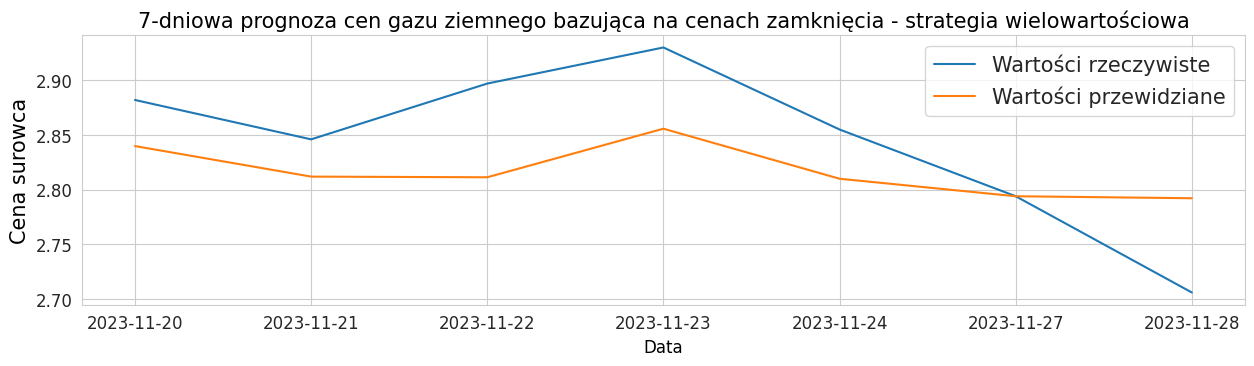

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,3.5))
sns.set_style("whitegrid")
plt.plot(df_final_prediction_7days['Actual'].head(7), label='Wartości rzeczywiste')
plt.plot(df_final_prediction_7days['Prediction'].head(7), label='Wartości przewidziane')
plt.title("7-dniowa prognoza cen gazu ziemnego bazująca na cenach zamknięcia - strategia wielowartościowa", color = 'black', fontsize = 15)
plt.xlabel('Data', color = 'black', fontsize = 12)
plt.xticks(fontsize=12)
plt.ylabel('Cena surowca', color = 'black', fontsize = 15)
plt.yticks(fontsize=12)
plt.legend(fontsize = 15);

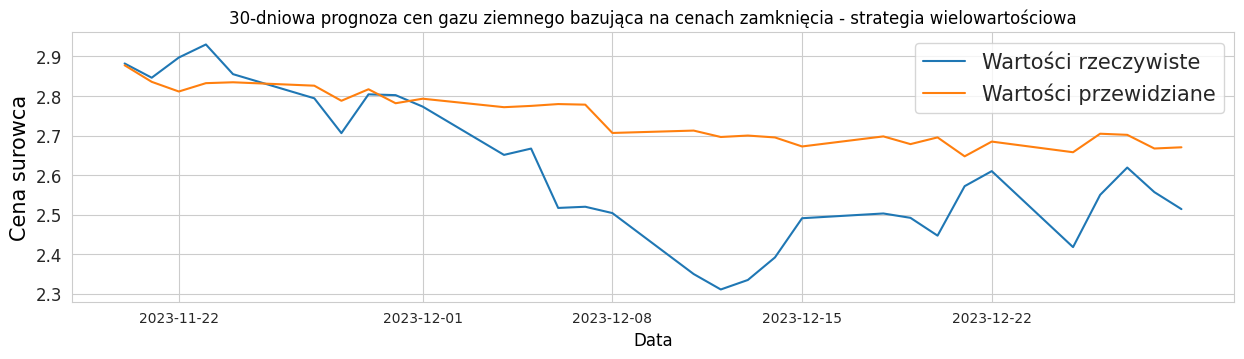

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,3.5))
sns.set_style("whitegrid")
plt.plot(df_final_prediction_30days['Actual'].head(30), label='Wartości rzeczywiste')
plt.plot(df_final_prediction_30days['Prediction'].head(30), label='Wartości przewidziane')
plt.title("30-dniowa prognoza cen gazu ziemnego bazująca na cenach zamknięcia - strategia wielowartościowa", color = 'black', fontsize = 12)
plt.xlabel('Data', color = 'black', fontsize = 12)
plt.xticks(fontsize=10)
plt.ylabel('Cena surowca', color = 'black', fontsize = 15)
plt.yticks(fontsize=12)
plt.legend(fontsize=15);